In [ ]:
!pip install geopandas
!pip install folium
!pip install lightgbm
!pip install utm
!pip install geojson 
!pip install haversine

# folium 한글 설치
!pip install git+https://github.com/python-visualization/branca.git@master

# 시각화 도구 설치
!pip install plotnine #R 시각화 
!pip install folium #지도 시각화 

In [214]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [215]:
!pip install pickle5
import pickle5 as pickle

In [7]:
import pickle5 as pickle

In [2]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

NanumGothic Eco


In [3]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
import folium 
import geopandas as gpd
import math
import fiona
from tqdm.notebook import tqdm
import utm
from shapely.geometry import Point, Polygon
from haversine import haversine
from plotnine import *

In [4]:
import warnings
warnings.filterwarnings(action='ignore') #경고 메시지 무시
from IPython.display import display #print가 아닌 display()로 연속 출력
from IPython.display import HTML #출력 결과를 HTML로 생성

## 강서구_선형결합 (화곡1동 1150054000)

In [33]:
df_demand = pd.read_pickle('/content/drive/My Drive/Project/Seoul/가공데이터/동3개/지수결과/화곡제1동인프라지수1014.pkl')
df_demand = df_demand[df_demand['행정동코드']==1150054000][['gid', '행정동', '100분위']]
df_demand['100분위'] = df_demand['100분위'].astype(int)
df_demand

,gid,행정동,100분위
0,다사41ab48ba,화곡제1동,0
1,다사41ab48bb,화곡제1동,0
2,다사41ab49aa,화곡제1동,0
3,다사41ba48aa,화곡제1동,0
4,다사41ba48ab,화곡제1동,0
5,다사41ba48ba,화곡제1동,0
6,다사41ba48bb,화곡제1동,0
7,다사41ba49aa,화곡제1동,0
8,다사41bb47bb,화곡제1동,0
9,다사41bb48aa,화곡제1동,0


In [34]:
df_demand.sort_values(by = '100분위', ascending=False)

,gid,행정동,100분위
0,다사41ab48ba,화곡제1동,0
9,다사41bb48aa,화곡제1동,0
15,다사42aa48ab,화곡제1동,0
14,다사42aa48aa,화곡제1동,0
13,다사42aa47bb,화곡제1동,0
12,다사41bb48bb,화곡제1동,0
11,다사41bb48ba,화곡제1동,0
10,다사41bb48ab,화곡제1동,0
8,다사41bb47bb,화곡제1동,0
1,다사41ab48bb,화곡제1동,0


In [35]:
df_alone = pd.read_csv("/content/drive/My Drive/Project/Seoul/가공데이터/동3개/지수결과/화곡제1동_강서구 돌봄틈새공백.csv")
df_alone.columns = ['Unnamed: 0', 'gid', '행정동코드','시군구명','행정동명', '학교명', '학교개수', '초등학생_인구',
       '30대_인구', '40대_인구', '전체_인구', '경도', '위도', 'geometry', '돌봄 틈새공백 인구',
       '지역별 돌봄 틈새공백 인구 비율', '돌봄틈새공백 분위']
df_alone

,Unnamed: 0,gid,행정동코드,시군구명,행정동명,학교명,학교개수,초등학생_인구,30대_인구,40대_인구,전체_인구,경도,위도,geometry,돌봄 틈새공백 인구,지역별 돌봄 틈새공백 인구 비율,돌봄틈새공백 분위
0,0,다사41ab48ba,1150054000,강서구,화곡제1동,['서울신원초등학교' '서울월정초등학교' '서울신월초등학교'],3,125.0,310.0,359.0,2085.0,126.836440,37.535080,POINT (126.8364401034347 37.5350797122308),0.441033,0.003528,10
1,1,다사41ab48bb,1150054000,강서구,화곡제1동,['서울강신초등학교' '서울월정초등학교' '서울신월초등학교'],3,64.0,353.0,360.0,2006.0,126.836420,37.537333,POINT (126.8364201367806 37.53733296353749),0.250138,0.003908,4
2,2,다사41ab49aa,1150054000,강서구,화곡제1동,['서울강신초등학교' '서울월정초등학교' '서울신월초등학교'],3,104.0,430.0,403.0,2288.0,126.836400,37.539586,POINT (126.8364001679027 37.53958621397317),0.416355,0.004003,9
3,3,다사41ba48aa,1150054000,강서구,화곡제1동,['서울신원초등학교' '서울신강초등학교' '서울월정초등학교'],3,68.0,559.0,397.0,2535.0,126.839309,37.530589,POINT (126.8393093668829 37.53058906992494),0.281987,0.004147,4
4,4,다사41ba48ab,1150054000,강서구,화곡제1동,['서울신강초등학교' '서울월정초등학교' '서울신월초등학교'],3,64.0,493.0,350.0,2542.0,126.839289,37.532842,POINT (126.8392894897816 37.53284232425683),0.233385,0.003647,3
5,5,다사41ba48ba,1150054000,강서구,화곡제1동,['서울월정초등학교' '서울신월초등학교'],2,143.0,479.0,482.0,2890.0,126.839270,37.535096,POINT (126.8392696104666 37.53509557771783),0.522881,0.003657,10
6,6,다사41ba48bb,1150054000,강서구,화곡제1동,['서울화일초등학교' '서울월정초등학교' '서울신월초등학교'],3,85.0,523.0,396.0,2628.0,126.839250,37.537349,POINT (126.8392497289378 37.53734883030793),0.326851,0.003845,7
7,7,다사41ba49aa,1150054000,강서구,화곡제1동,['서울화일초등학교' '서울화곡초등학교' '서울월정초등학교' '서울신월초등학교'],4,92.0,517.0,419.0,2553.0,126.839230,37.539602,POINT (126.8392298451948 37.53960208202711),0.370897,0.004031,7
8,8,다사41bb47bb,1150054000,강서구,화곡제1동,['서울강서초등학교' '서울신강초등학교' '서울양강초등학교' '서울양동초등학교'],4,63.0,983.0,584.0,3839.0,126.842158,37.528352,POINT (126.8421584956968 37.52835160858734),0.282769,0.004488,5
9,9,다사41bb48aa,1150054000,강서구,화곡제1동,['서울신강초등학교' '서울월정초등학교'],2,85.0,1209.0,758.0,4878.0,126.842139,37.530605,POINT (126.842138705906 37.53060486506782),0.376897,0.004434,8


In [36]:
df_alone.sort_values(by = '돌봄틈새공백 분위', ascending=False)

,Unnamed: 0,gid,행정동코드,시군구명,행정동명,학교명,학교개수,초등학생_인구,30대_인구,40대_인구,전체_인구,경도,위도,geometry,돌봄 틈새공백 인구,지역별 돌봄 틈새공백 인구 비율,돌봄틈새공백 분위
0,0,다사41ab48ba,1150054000,강서구,화곡제1동,['서울신원초등학교' '서울월정초등학교' '서울신월초등학교'],3,125.0,310.0,359.0,2085.0,126.836440,37.535080,POINT (126.8364401034347 37.5350797122308),0.441033,0.003528,10
5,5,다사41ba48ba,1150054000,강서구,화곡제1동,['서울월정초등학교' '서울신월초등학교'],2,143.0,479.0,482.0,2890.0,126.839270,37.535096,POINT (126.8392696104666 37.53509557771783),0.522881,0.003657,10
2,2,다사41ab49aa,1150054000,강서구,화곡제1동,['서울강신초등학교' '서울월정초등학교' '서울신월초등학교'],3,104.0,430.0,403.0,2288.0,126.836400,37.539586,POINT (126.8364001679027 37.53958621397317),0.416355,0.004003,9
11,11,다사41bb48ba,1150054000,강서구,화곡제1동,['서울화일초등학교' '서울월정초등학교' '서울신월초등학교'],3,105.0,634.0,604.0,3608.0,126.842099,37.535111,POINT (126.8420991197124 37.53511137541636),0.396173,0.003773,9
9,9,다사41bb48aa,1150054000,강서구,화곡제1동,['서울신강초등학교' '서울월정초등학교'],2,85.0,1209.0,758.0,4878.0,126.842139,37.530605,POINT (126.842138705906 37.53060486506782),0.376897,0.004434,8
6,6,다사41ba48bb,1150054000,강서구,화곡제1동,['서울화일초등학교' '서울월정초등학교' '서울신월초등학교'],3,85.0,523.0,396.0,2628.0,126.839250,37.537349,POINT (126.8392497289378 37.53734883030793),0.326851,0.003845,7
7,7,다사41ba49aa,1150054000,강서구,화곡제1동,['서울화일초등학교' '서울화곡초등학교' '서울월정초등학교' '서울신월초등학교'],4,92.0,517.0,419.0,2553.0,126.839230,37.539602,POINT (126.8392298451948 37.53960208202711),0.370897,0.004031,7
14,14,다사42aa48aa,1150054000,강서구,화곡제1동,['서울신강초등학교' '서울양강초등학교' '서울양동초등학교' '서울신정초등학교'],4,72.0,1168.0,613.0,4422.0,126.844968,37.530621,POINT (126.8449680471329 37.53062059243302),0.318874,0.004429,6
10,10,다사41bb48ab,1150054000,강서구,화곡제1동,['서울신강초등학교' '서울월정초등학교' '서울신월초등학교'],3,78.0,648.0,468.0,3286.0,126.842119,37.532858,POINT (126.8421189139113 37.5328581206775),0.291294,0.003735,5
8,8,다사41bb47bb,1150054000,강서구,화곡제1동,['서울강서초등학교' '서울신강초등학교' '서울양강초등학교' '서울양동초등학교'],4,63.0,983.0,584.0,3839.0,126.842158,37.528352,POINT (126.8421584956968 37.52835160858734),0.282769,0.004488,5


In [37]:
df_demand.merge(df_alone, on = 'gid')

,gid,행정동,100분위,Unnamed: 0,행정동코드,시군구명,행정동명,학교명,학교개수,초등학생_인구,30대_인구,40대_인구,전체_인구,경도,위도,geometry,돌봄 틈새공백 인구,지역별 돌봄 틈새공백 인구 비율,돌봄틈새공백 분위
0,다사41ab48ba,화곡제1동,0,0,1150054000,강서구,화곡제1동,['서울신원초등학교' '서울월정초등학교' '서울신월초등학교'],3,125.0,310.0,359.0,2085.0,126.836440,37.535080,POINT (126.8364401034347 37.5350797122308),0.441033,0.003528,10
1,다사41ab48bb,화곡제1동,0,1,1150054000,강서구,화곡제1동,['서울강신초등학교' '서울월정초등학교' '서울신월초등학교'],3,64.0,353.0,360.0,2006.0,126.836420,37.537333,POINT (126.8364201367806 37.53733296353749),0.250138,0.003908,4
2,다사41ab49aa,화곡제1동,0,2,1150054000,강서구,화곡제1동,['서울강신초등학교' '서울월정초등학교' '서울신월초등학교'],3,104.0,430.0,403.0,2288.0,126.836400,37.539586,POINT (126.8364001679027 37.53958621397317),0.416355,0.004003,9
3,다사41ba48aa,화곡제1동,0,3,1150054000,강서구,화곡제1동,['서울신원초등학교' '서울신강초등학교' '서울월정초등학교'],3,68.0,559.0,397.0,2535.0,126.839309,37.530589,POINT (126.8393093668829 37.53058906992494),0.281987,0.004147,4
4,다사41ba48ab,화곡제1동,0,4,1150054000,강서구,화곡제1동,['서울신강초등학교' '서울월정초등학교' '서울신월초등학교'],3,64.0,493.0,350.0,2542.0,126.839289,37.532842,POINT (126.8392894897816 37.53284232425683),0.233385,0.003647,3
5,다사41ba48ba,화곡제1동,0,5,1150054000,강서구,화곡제1동,['서울월정초등학교' '서울신월초등학교'],2,143.0,479.0,482.0,2890.0,126.839270,37.535096,POINT (126.8392696104666 37.53509557771783),0.522881,0.003657,10
6,다사41ba48bb,화곡제1동,0,6,1150054000,강서구,화곡제1동,['서울화일초등학교' '서울월정초등학교' '서울신월초등학교'],3,85.0,523.0,396.0,2628.0,126.839250,37.537349,POINT (126.8392497289378 37.53734883030793),0.326851,0.003845,7
7,다사41ba49aa,화곡제1동,0,7,1150054000,강서구,화곡제1동,['서울화일초등학교' '서울화곡초등학교' '서울월정초등학교' '서울신월초등학교'],4,92.0,517.0,419.0,2553.0,126.839230,37.539602,POINT (126.8392298451948 37.53960208202711),0.370897,0.004031,7
8,다사41bb47bb,화곡제1동,0,8,1150054000,강서구,화곡제1동,['서울강서초등학교' '서울신강초등학교' '서울양강초등학교' '서울양동초등학교'],4,63.0,983.0,584.0,3839.0,126.842158,37.528352,POINT (126.8421584956968 37.52835160858734),0.282769,0.004488,5
9,다사41bb48aa,화곡제1동,0,9,1150054000,강서구,화곡제1동,['서울신강초등학교' '서울월정초등학교'],2,85.0,1209.0,758.0,4878.0,126.842139,37.530605,POINT (126.842138705906 37.53060486506782),0.376897,0.004434,8


In [38]:
df_demand['gid'] = df_demand['gid']
df_alone['gid'] = df_alone['gid']
df_final = df_demand.merge(df_alone, on = 'gid')
df_final = df_final[['gid', '시군구명', '행정동명', '100분위','돌봄틈새공백 분위']]
df_final

,gid,시군구명,행정동명,100분위,돌봄틈새공백 분위
0,다사41ab48ba,강서구,화곡제1동,0,10
1,다사41ab48bb,강서구,화곡제1동,0,4
2,다사41ab49aa,강서구,화곡제1동,0,9
3,다사41ba48aa,강서구,화곡제1동,0,4
4,다사41ba48ab,강서구,화곡제1동,0,3
5,다사41ba48ba,강서구,화곡제1동,0,10
6,다사41ba48bb,강서구,화곡제1동,0,7
7,다사41ba49aa,강서구,화곡제1동,0,7
8,다사41bb47bb,강서구,화곡제1동,0,5
9,다사41bb48aa,강서구,화곡제1동,0,8


In [39]:
df_final.columns  = ['gid', '시군구명', '행정동명', '돌봄시설중요지수_분위', '틈새돌봄_분위']

In [40]:
# 소득
df_income = pd.read_csv('/content/drive/My Drive/Project/Seoul/가공데이터/동3개/지수결과/화곡제1동_격자별_소득분위(k=3,5,35).csv')
df_income

,행정동코드,행정동,gid,추정소득 k=35,추정소득 k=5,추정소득 k=3,소득분위35,소득분위3,소득분위5
0,1150054000,화곡제1동,다사41ab48ba,-0.564245,-0.537473,-0.486598,4,2,2
1,1150054000,화곡제1동,다사41ab48bb,-0.711591,-0.703590,-0.668518,6,2,3
2,1150054000,화곡제1동,다사41ab49aa,-0.642898,-0.749382,-0.814192,4,6,4
3,1150054000,화곡제1동,다사41ba48aa,-0.700760,-0.906992,-0.887201,6,7,8
4,1150054000,화곡제1동,다사41ba48ab,-1.016553,-1.044603,-1.008095,9,10,10
5,1150054000,화곡제1동,다사41ba48ba,-1.043688,-1.059108,-1.054430,10,10,10
6,1150054000,화곡제1동,다사41ba48bb,-0.784803,-0.949551,-0.946174,7,9,9
7,1150054000,화곡제1동,다사41ba49aa,-0.207455,-0.864269,-0.879580,2,7,7
8,1150054000,화곡제1동,다사41bb47bb,-0.796126,-0.743076,-0.725902,7,4,4
9,1150054000,화곡제1동,다사41bb48aa,-0.000222,0.526481,0.523533,1,1,1


In [41]:
df_income.sort_values(by = '소득분위35', ascending=False)

,행정동코드,행정동,gid,추정소득 k=35,추정소득 k=5,추정소득 k=3,소득분위35,소득분위3,소득분위5
10,1150054000,화곡제1동,다사41bb48ab,-1.036655,-0.928578,-0.892855,10,8,9
5,1150054000,화곡제1동,다사41ba48ba,-1.043688,-1.059108,-1.054430,10,10,10
13,1150054000,화곡제1동,다사42aa47bb,-0.907363,-0.837486,-0.839469,9,6,6
4,1150054000,화곡제1동,다사41ba48ab,-1.016553,-1.044603,-1.008095,9,10,10
12,1150054000,화곡제1동,다사41bb48bb,-0.802914,-0.753391,-0.766061,8,5,6
8,1150054000,화곡제1동,다사41bb47bb,-0.796126,-0.743076,-0.725902,7,4,4
6,1150054000,화곡제1동,다사41ba48bb,-0.784803,-0.949551,-0.946174,7,9,9
3,1150054000,화곡제1동,다사41ba48aa,-0.700760,-0.906992,-0.887201,6,7,8
1,1150054000,화곡제1동,다사41ab48bb,-0.711591,-0.703590,-0.668518,6,2,3
11,1150054000,화곡제1동,다사41bb48ba,-0.668120,-0.749779,-0.714982,5,4,5


### merge

In [42]:
df_1 = df_demand.merge(df_alone, on = 'gid')
df_final_hwagok = df_1.merge(df_income, on='gid')

df_final_hwagok = df_final_hwagok[['gid', '시군구명', '행정동명', '100분위','돌봄틈새공백 분위','소득분위35']]
df_final_hwagok.columns = ['gid', '시군구명', '행정동명', '돌봄시설중요지수_분위','틈새돌봄_분위','소득_분위']
df_final_hwagok

,gid,시군구명,행정동명,돌봄시설중요지수_분위,틈새돌봄_분위,소득_분위
0,다사41ab48ba,강서구,화곡제1동,0,10,4
1,다사41ab48bb,강서구,화곡제1동,0,4,6
2,다사41ab49aa,강서구,화곡제1동,0,9,4
3,다사41ba48aa,강서구,화곡제1동,0,4,6
4,다사41ba48ab,강서구,화곡제1동,0,3,9
5,다사41ba48ba,강서구,화곡제1동,0,10,10
6,다사41ba48bb,강서구,화곡제1동,0,7,7
7,다사41ba49aa,강서구,화곡제1동,0,7,2
8,다사41bb47bb,강서구,화곡제1동,0,5,7
9,다사41bb48aa,강서구,화곡제1동,0,8,1


In [43]:
# 돌봄에 많이 
a, b, c = 2, 2, 1

df_final_hwagok['선형결합_지수'] = df_final_hwagok['돌봄시설중요지수_분위']*a + df_final_hwagok['틈새돌봄_분위']*b + df_final_hwagok['소득_분위']*c
df_final_hwagok = df_final_hwagok.sort_values(by = '선형결합_지수', ascending = False).reset_index().drop('index', axis=1)
df_final_hwagok

,gid,시군구명,행정동명,돌봄시설중요지수_분위,틈새돌봄_분위,소득_분위,선형결합_지수
0,다사41ba48ba,강서구,화곡제1동,0,10,10,30
1,다사41ab48ba,강서구,화곡제1동,0,10,4,24
2,다사41bb48ba,강서구,화곡제1동,0,9,5,23
3,다사41ab49aa,강서구,화곡제1동,0,9,4,22
4,다사41ba48bb,강서구,화곡제1동,0,7,7,21
5,다사41bb48ab,강서구,화곡제1동,0,5,10,20
6,다사41bb48aa,강서구,화곡제1동,0,8,1,17
7,다사41bb47bb,강서구,화곡제1동,0,5,7,17
8,다사41ba49aa,강서구,화곡제1동,0,7,2,16
9,다사41ba48ab,강서구,화곡제1동,0,3,9,15


In [44]:
df_final_hwagok.head(10)

,gid,시군구명,행정동명,돌봄시설중요지수_분위,틈새돌봄_분위,소득_분위,선형결합_지수
0,다사41ba48ba,강서구,화곡제1동,0,10,10,30
1,다사41ab48ba,강서구,화곡제1동,0,10,4,24
2,다사41bb48ba,강서구,화곡제1동,0,9,5,23
3,다사41ab49aa,강서구,화곡제1동,0,9,4,22
4,다사41ba48bb,강서구,화곡제1동,0,7,7,21
5,다사41bb48ab,강서구,화곡제1동,0,5,10,20
6,다사41bb48aa,강서구,화곡제1동,0,8,1,17
7,다사41bb47bb,강서구,화곡제1동,0,5,7,17
8,다사41ba49aa,강서구,화곡제1동,0,7,2,16
9,다사41ba48ab,강서구,화곡제1동,0,3,9,15


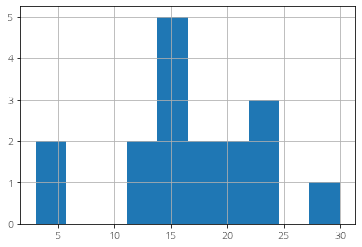

In [45]:
df_final_hwagok['선형결합_지수'].hist()

{'boxes': [<matplotlib.lines.Line2D at 0x7f7e534fbe80>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7e5350b8d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7e53517390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7e5350bfd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7e5350b1d0>,
  <matplotlib.lines.Line2D at 0x7f7e5350b550>]}

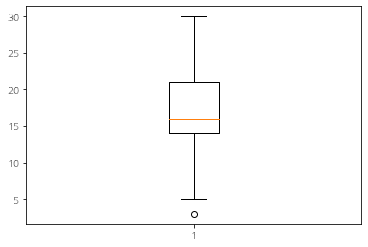

In [46]:
plt.boxplot(df_final_hwagok['선형결합_지수'])

### 위치정보 merge

In [47]:
merge_base = pd.read_csv('/content/drive/My Drive/Project/Seoul/가공데이터/동3개/지수결과/화곡제1동_강서구 돌봄틈새공백.csv')[['gid', '위도', '경도', '행정동코드']]
merge_base

,gid,위도,경도,행정동코드
0,다사41ab48ba,37.535080,126.836440,1150054000
1,다사41ab48bb,37.537333,126.836420,1150054000
2,다사41ab49aa,37.539586,126.836400,1150054000
3,다사41ba48aa,37.530589,126.839309,1150054000
4,다사41ba48ab,37.532842,126.839289,1150054000
5,다사41ba48ba,37.535096,126.839270,1150054000
6,다사41ba48bb,37.537349,126.839250,1150054000
7,다사41ba49aa,37.539602,126.839230,1150054000
8,다사41bb47bb,37.528352,126.842158,1150054000
9,다사41bb48aa,37.530605,126.842139,1150054000


In [48]:
df_loc_hwagok = merge_base.merge(df_final_hwagok, on='gid').sort_values(by = '선형결합_지수', ascending = False).reset_index().drop('index', axis=1)
df_loc_hwagok

,gid,위도,경도,행정동코드,시군구명,행정동명,돌봄시설중요지수_분위,틈새돌봄_분위,소득_분위,선형결합_지수
0,다사41ba48ba,37.535096,126.839270,1150054000,강서구,화곡제1동,0,10,10,30
1,다사41ab48ba,37.535080,126.836440,1150054000,강서구,화곡제1동,0,10,4,24
2,다사41bb48ba,37.535111,126.842099,1150054000,강서구,화곡제1동,0,9,5,23
3,다사41ab49aa,37.539586,126.836400,1150054000,강서구,화곡제1동,0,9,4,22
4,다사41ba48bb,37.537349,126.839250,1150054000,강서구,화곡제1동,0,7,7,21
5,다사41bb48ab,37.532858,126.842119,1150054000,강서구,화곡제1동,0,5,10,20
6,다사41bb48aa,37.530605,126.842139,1150054000,강서구,화곡제1동,0,8,1,17
7,다사41bb47bb,37.528352,126.842158,1150054000,강서구,화곡제1동,0,5,7,17
8,다사41ba49aa,37.539602,126.839230,1150054000,강서구,화곡제1동,0,7,2,16
9,다사41ba48ab,37.532842,126.839289,1150054000,강서구,화곡제1동,0,3,9,15


In [49]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(df_loc_hwagok['경도'], df_loc_hwagok['위도'])]
# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}
# Creating a Geographic data frame 
df_loc_hwagok = gpd.GeoDataFrame(df_loc_hwagok, crs=crs, geometry=geometry)
df_loc_hwagok

,gid,위도,경도,행정동코드,시군구명,행정동명,돌봄시설중요지수_분위,틈새돌봄_분위,소득_분위,선형결합_지수,geometry
0,다사41ba48ba,37.535096,126.839270,1150054000,강서구,화곡제1동,0,10,10,30,POINT (126.83927 37.53510)
1,다사41ab48ba,37.535080,126.836440,1150054000,강서구,화곡제1동,0,10,4,24,POINT (126.83644 37.53508)
2,다사41bb48ba,37.535111,126.842099,1150054000,강서구,화곡제1동,0,9,5,23,POINT (126.84210 37.53511)
3,다사41ab49aa,37.539586,126.836400,1150054000,강서구,화곡제1동,0,9,4,22,POINT (126.83640 37.53959)
4,다사41ba48bb,37.537349,126.839250,1150054000,강서구,화곡제1동,0,7,7,21,POINT (126.83925 37.53735)
5,다사41bb48ab,37.532858,126.842119,1150054000,강서구,화곡제1동,0,5,10,20,POINT (126.84212 37.53286)
6,다사41bb48aa,37.530605,126.842139,1150054000,강서구,화곡제1동,0,8,1,17,POINT (126.84214 37.53060)
7,다사41bb47bb,37.528352,126.842158,1150054000,강서구,화곡제1동,0,5,7,17,POINT (126.84216 37.52835)
8,다사41ba49aa,37.539602,126.839230,1150054000,강서구,화곡제1동,0,7,2,16,POINT (126.83923 37.53960)
9,다사41ba48ab,37.532842,126.839289,1150054000,강서구,화곡제1동,0,3,9,15,POINT (126.83929 37.53284)


### 화곡동_시각화

In [98]:
dong_geo = gpd.read_file('/content/drive/My Drive/Project/Seoul/서울시_행정동경계/hangjeongdong_boundary.geojson')

In [99]:
hwagok_geo = dong_geo[dong_geo['행정동코드']==1150054000]
hwagok_geo

,행정동코드,시군구명,읍면동명,위도,경도,geometry
258,1150054000,강서구,화곡제1동,37.53378,126.840936,"MULTIPOLYGON (((126.84044 37.54162, 126.84369 ..."


In [100]:
df_pop = pd.read_pickle('/content/drive/My Drive/Project/Seoul/가공데이터/동3개/동3개_초등학교881m_인구.pickle')
df_pop

,gid,행정동코드,시군구명,행정동,학교명,학교개수,초등학생_인구,30대_인구,40대_인구,전체_인구,경도,위도,geometry
0,다사41ab48ba,1150054000,강서구,화곡제1동,"[서울신원초등학교, 서울월정초등학교, 서울신월초등학교]",3,125.0,310.0,359.0,2085.0,126.836440,37.535080,POINT (126.83644 37.53508)
1,다사41ab48bb,1150054000,강서구,화곡제1동,"[서울강신초등학교, 서울월정초등학교, 서울신월초등학교]",3,64.0,353.0,360.0,2006.0,126.836420,37.537333,POINT (126.83642 37.53733)
2,다사41ab49aa,1150054000,강서구,화곡제1동,"[서울강신초등학교, 서울월정초등학교, 서울신월초등학교]",3,104.0,430.0,403.0,2288.0,126.836400,37.539586,POINT (126.83640 37.53959)
3,다사41ba48aa,1150054000,강서구,화곡제1동,"[서울신원초등학교, 서울신강초등학교, 서울월정초등학교]",3,68.0,559.0,397.0,2535.0,126.839309,37.530589,POINT (126.83931 37.53059)
4,다사41ba48ab,1150054000,강서구,화곡제1동,"[서울신강초등학교, 서울월정초등학교, 서울신월초등학교]",3,64.0,493.0,350.0,2542.0,126.839289,37.532842,POINT (126.83929 37.53284)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,다사65ab50ab,1121581000,광진구,광장동,"[서울광장초등학교, 서울동의초등학교]",2,14.0,43.0,43.0,433.0,127.107999,37.552067,POINT (127.10800 37.55207)
77,다사65ab50ba,1121581000,광진구,광장동,"[서울광장초등학교, 서울동의초등학교]",2,0.0,0.0,0.0,0.0,127.107987,37.554320,POINT (127.10799 37.55432)
78,다사65ab50bb,1121581000,광진구,광장동,[서울동의초등학교],1,0.0,0.0,0.0,0.0,127.107975,37.556574,POINT (127.10798 37.55657)
79,다사65ba49bb,1121581000,광진구,광장동,[서울광장초등학교],1,0.0,0.0,6.0,32.0,127.110853,37.547570,POINT (127.11085 37.54757)


In [101]:
# 화곡동 초등학교 인구 
hwagok_ele_pop = df_pop.groupby(['행정동코드','행정동'],as_index=False).agg('sum').drop(['경도', '위도'],axis=1)
hwagok_ele_pop = hwagok_ele_pop.merge(df_pop[['행정동코드', '위도', '경도']], on='행정동코드')
hwagok_ele_pop

,행정동코드,행정동,학교개수,초등학생_인구,30대_인구,40대_인구,전체_인구,위도,경도
0,1121581000,광장동,102,3448.0,4209.0,7993.0,39125.0,37.543006,127.093896
1,1121581000,광장동,102,3448.0,4209.0,7993.0,39125.0,37.540762,127.096739
2,1121581000,광장동,102,3448.0,4209.0,7993.0,39125.0,37.543016,127.096726
3,1121581000,광장동,102,3448.0,4209.0,7993.0,39125.0,37.545269,127.096714
4,1121581000,광장동,102,3448.0,4209.0,7993.0,39125.0,37.538519,127.099580
...,...,...,...,...,...,...,...,...,...
76,1150054000,화곡제1동,56,1278.0,9798.0,7283.0,46557.0,37.537365,126.842079
77,1150054000,화곡제1동,56,1278.0,9798.0,7283.0,46557.0,37.528367,126.844988
78,1150054000,화곡제1동,56,1278.0,9798.0,7283.0,46557.0,37.530621,126.844968
79,1150054000,화곡제1동,56,1278.0,9798.0,7283.0,46557.0,37.532874,126.844948


In [102]:
df_school = pd.read_pickle('/content/drive/My Drive/Project/Seoul/초등학교/초등학교.pickle')

# 은평구 초등학교 위치 (+ 마포구)
mask1 = df_school['구']=='강서구'
# mask2 = df_school['구']== '마포구'
hwagok_school = df_school[mask1]
hwagok_school

,학교명,구,행정동코드,행정동,소재지지번주소,소재지도로명주소,위도,경도,geometry
373,서울화일초등학교,강서구,1150059000,화곡본동,서울특별시 강서구 화곡동 61-184,서울특별시 강서구 까치산로10길 70,37.540726,126.847408,POINT (126.84741 37.54073)
374,서울우장초등학교,강서구,1150061500,우장산동,서울특별시 강서구 화곡동 18-5,서울특별시 강서구 화곡로 263,37.549637,126.845983,POINT (126.84598 37.54964)
375,서울신정초등학교,강서구,1150055000,화곡제2동,서울특별시 강서구 화곡동 869-42,서울특별시 강서구 곰달래로31가길 27,37.532072,126.852359,POINT (126.85236 37.53207)
376,서울신곡초등학교,강서구,1150057000,화곡제4동,서울특별시 강서구 화곡동 476-42,서울특별시 강서구 등촌로13자길 42-14,37.539094,126.856012,POINT (126.85601 37.53909)
377,서울등마초등학교,강서구,1150053000,등촌제2동,서울특별시 강서구 등촌동 718,서울특별시 강서구 등촌로35길 12,37.542045,126.861668,POINT (126.86167 37.54205)
378,서울등양초등학교,강서구,1150053500,등촌제3동,서울특별시 강서구 등촌동 691,서울특별시 강서구 강서로56나길 140,37.564946,126.844761,POINT (126.84476 37.56495)
379,서울염경초등학교,강서구,1150051000,염창동,서울특별시 강서구 염창동 79,서울특별시 강서구 양천로69길 49,37.555002,126.871205,POINT (126.87121 37.55500)
380,서울염창초등학교,강서구,1150051000,염창동,서울특별시 강서구 염창동 269,서울특별시 강서구 양천로 646-28,37.553224,126.867600,POINT (126.86760 37.55322)
381,서울치현초등학교,강서구,1150064100,방화제3동,서울특별시 강서구 방화동 833,서울특별시 강서구 방화대로47길 43,37.575919,126.814644,POINT (126.81464 37.57592)
382,서울삼정초등학교,강서구,1150064100,방화제3동,서울특별시 강서구 방화동 798,서울특별시 강서구 금낭화로 222,37.580508,126.810494,POINT (126.81049 37.58051)


In [103]:
df_loc_hwagok.head()

,gid,위도,경도,행정동코드,시군구명,행정동명,돌봄시설중요지수_분위,틈새돌봄_분위,소득_분위,선형결합_지수,geometry
0,다사41ba48ba,37.535096,126.839270,1150054000,강서구,화곡제1동,0,10,10,30,POINT (126.83927 37.53510)
1,다사41ab48ba,37.535080,126.836440,1150054000,강서구,화곡제1동,0,10,4,24,POINT (126.83644 37.53508)
2,다사41bb48ba,37.535111,126.842099,1150054000,강서구,화곡제1동,0,9,5,23,POINT (126.84210 37.53511)
3,다사41ab49aa,37.539586,126.836400,1150054000,강서구,화곡제1동,0,9,4,22,POINT (126.83640 37.53959)
4,다사41ba48bb,37.537349,126.839250,1150054000,강서구,화곡제1동,0,7,7,21,POINT (126.83925 37.53735)


In [ ]:
# Train 데이터 좌표 위치 
center = (37.535096,	126.839270)
zoom = 13
# cartodbpositron

m = folium.Map(location=center, zoom_start=zoom)
folium.Choropleth(
    geo_data = hwagok_geo,
    data = hwagok_ele_pop,
    columns = ('행정동', '초등학생_인구'),
    key_on = 'feature.properties.읍면동명',
    fill_color = 'Blues',
    legend_name = '초등학생_인구'
).add_to(m)

# 행정동 naming 
for index, row in hwagok_geo.iterrows():
    title = f"{row['시군구명']} - {row['읍면동명']}"
    folium.CircleMarker([row['위도'], row['경도']], popup=title, radius =1,color = 'white').add_to(m)

# 초등학교 위치
for index, row in hwagok_school.iterrows():
    title = f"{row['학교명']}"
    folium.Marker([row['위도'], row['경도']],popup=title, icon=folium.Icon(icon ='dumbell', color = 'blue')).add_to(m)  
    # folium.Circle([row['위도'], row['경도']], radius =881, fill='#ffa5a5', color = '#ffa5a5').add_to(m)

# # 전체 target 좌표
# for index, row in pop_30.iterrows():  
#     folium.Circle([row['위도'], row['경도']],
#                   radius = 3, color = 'red' ).add_to(m)   
# 행정동 내 좌표 
for index, row in df_pop.iterrows():  
    folium.Circle([row['위도'], row['경도']],
                  radius = 3, color = 'black' ).add_to(m)

for index, row in df_loc_hwagok[:1].iterrows():
  folium.Marker([row['위도'], row['경도']], icon=folium.Icon(icon ='dumbell', color = 'red')).add_to(m)
  folium.Circle([row['위도'], row['경도']], radius =250, fill='#ffa5a5', color = 'blue').add_to(m)
  folium.Circle([row['위도'], row['경도']], radius =881, fill='#ffa5a5', color = '#ffa5a5').add_to(m)

# for index, row in df_jingwan[:1].iterrows():
#   folium.Marker([row['위도'], row['경도']], icon=folium.Icon(icon ='dumbell', color = 'green')).add_to(m)
#   folium.Circle([row['위도'], row['경도']], radius =881, fill='#ffa5a5', color = '#ffa5a5').add_to(m)
m

### 시설하나 추가 -> 격자 수정

In [ ]:
df_loc_hwagok

,gid,위도,경도,행정동코드,시군구명,행정동명,돌봄시설중요지수_분위,틈새돌봄_분위,소득_분위,선형결합_지수,geometry
0,다사41ba48ba,37.535096,126.839270,1150054000,강서구,화곡제1동,10,10,10,50,POINT (126.83927 37.53510)
1,다사41ab48ba,37.535080,126.836440,1150054000,강서구,화곡제1동,10,10,4,44,POINT (126.83644 37.53508)
2,다사41ba48bb,37.537349,126.839250,1150054000,강서구,화곡제1동,8,7,7,37,POINT (126.83925 37.53735)
3,다사41bb48ba,37.535111,126.842099,1150054000,강서구,화곡제1동,7,9,5,37,POINT (126.84210 37.53511)
4,다사41bb48aa,37.530605,126.842139,1150054000,강서구,화곡제1동,9,8,1,35,POINT (126.84214 37.53060)
5,다사41ab49aa,37.539586,126.836400,1150054000,강서구,화곡제1동,6,9,4,34,POINT (126.83640 37.53959)
6,다사42aa48aa,37.530621,126.844968,1150054000,강서구,화곡제1동,9,6,2,32,POINT (126.84497 37.53062)
7,다사41ba48ab,37.532842,126.839289,1150054000,강서구,화곡제1동,7,3,9,29,POINT (126.83929 37.53284)
8,다사41bb47bb,37.528352,126.842158,1150054000,강서구,화곡제1동,5,5,7,27,POINT (126.84216 37.52835)
9,다사41bb48ab,37.532858,126.842119,1150054000,강서구,화곡제1동,2,5,10,24,POINT (126.84212 37.53286)


In [ ]:
# 현재 각 학교주변 있는 좌표들 구하기 
# 아아들 도보 10분:  749.82m ~ 880.98m -> 오차 고려해서 881m로 
from tqdm.notebook import tqdm

def point_school(df_pop, df_school):
  lscp = []

  for k in tqdm(range(len(df_pop))): 
    gid_nm = df_pop['gid'].iloc[k]
    x = (df_pop['위도'].iloc[k], df_pop['경도'].iloc[k])
    for i in range(len(df_school)): 
      y = (df_school['위도'].iloc[i], df_school['경도'].iloc[i])
      h = haversine(x,y, unit='m') 
      if h <= 881:  #전체 좌표 중에서 초등학교 881m 있는 것만 필터링
        lscp.append([gid_nm, df_school['행정동명'].iloc[i], h])
  
  return lscp 

In [ ]:
df_loc_hwagok.head(1)

,gid,위도,경도,행정동코드,시군구명,행정동명,돌봄시설중요지수_분위,틈새돌봄_분위,소득_분위,선형결합_지수,geometry
0,다사41ba48ba,37.535096,126.83927,1150054000,강서구,화곡제1동,10,10,10,50,POINT (126.83927 37.53510)


In [ ]:
hwagok_update = pd.DataFrame(point_school(df_loc_hwagok, df_loc_hwagok.head(1)))
hwagok_update

,0,1,2
0,다사41ba48ba,화곡제1동,0.000000
1,다사41ab48ba,화곡제1동,249.499485
2,다사41ba48bb,화곡제1동,250.556735
3,다사41bb48ba,화곡제1동,249.499574
4,다사41bb48aa,화곡제1동,559.777022
5,다사41ab49aa,화곡제1동,559.776393
6,다사42aa48aa,화곡제1동,707.167512
7,다사41ba48ab,화곡제1동,250.556831
8,다사41bb47bb,화곡제1동,791.982946
9,다사41bb48ab,화곡제1동,353.583625


In [ ]:
hwagok_update = pd.DataFrame(point_school(df_loc_hwagok, df_loc_hwagok.head(1)))
hwagok_update

,0,1,2
0,다사41ba48ba,화곡제1동,0.000000
1,다사41ab48ba,화곡제1동,249.499485
2,다사41ba48bb,화곡제1동,250.556735
3,다사41bb48ba,화곡제1동,249.499574
4,다사41bb48aa,화곡제1동,559.777022
5,다사41ab49aa,화곡제1동,559.776393
6,다사42aa48aa,화곡제1동,707.167512
7,다사41ba48ab,화곡제1동,250.556831
8,다사41bb47bb,화곡제1동,791.982946
9,다사41bb48ab,화곡제1동,353.583625


## 성북구_선형결합 (종암동 1129070500)

In [50]:
df_demand = pd.read_pickle('/content/drive/My Drive/Project/Seoul/가공데이터/동3개/지수결과/종암동인프라지수1014.pkl')
df_demand = df_demand[df_demand['행정동코드']==1129070500][['gid', '행정동', '100분위']]
df_demand['100분위'] = df_demand['100분위'].astype(int)
df_demand

,gid,행정동,100분위
0,다사58aa55aa,종암동,1
1,다사58ab54bb,종암동,1
2,다사58ab55aa,종암동,1
3,다사58ab55ab,종암동,2
4,다사58ab55ba,종암동,3
5,다사58ab55bb,종암동,5
6,다사58ba54bb,종암동,1
7,다사58ba55aa,종암동,3
8,다사58ba55ab,종암동,10
9,다사58ba55ba,종암동,7


In [51]:
df_demand.sort_values(by = '100분위', ascending=False)

,gid,행정동,100분위
24,다사59ab55ba,종암동,10
13,다사58bb55aa,종암동,10
8,다사58ba55ab,종암동,10
23,다사59ab55ab,종암동,9
19,다사59aa55ab,종암동,9
21,다사59aa55bb,종암동,8
20,다사59aa55ba,종암동,8
14,다사58bb55ab,종암동,8
22,다사59ab55aa,종암동,7
9,다사58ba55ba,종암동,7


In [52]:
df_alone = pd.read_csv("/content/drive/My Drive/Project/Seoul/가공데이터/동3개/지수결과/종암동 돌봄틈새공백.csv")
df_alone.columns = ['Unnamed: 0', 'gid', '행정동코드','시군구명','행정동명', '학교명', '학교개수', '초등학생_인구',
       '30대_인구', '40대_인구', '전체_인구', '경도', '위도', 'geometry', '돌봄 틈새공백 인구',
       '지역별 돌봄 틈새공백 인구 비율', '돌봄틈새공백 분위']
df_alone

,Unnamed: 0,gid,행정동코드,시군구명,행정동명,학교명,학교개수,초등학생_인구,30대_인구,40대_인구,전체_인구,경도,위도,geometry,돌봄 틈새공백 인구,지역별 돌봄 틈새공백 인구 비율,돌봄틈새공백 분위
0,0,다사58aa55aa,1129070500,성북구,종암동,['서울개운초등학교' '서울숭례초등학교' '성신초등학교' '매원초등학교'],4,0.0,0.0,0.0,0.0,127.025650,37.594579,POINT (127.0256501675964 37.59457898496522),0.000000,0.000000,1
1,1,다사58ab54bb,1129070500,성북구,종암동,['서울안암초등학교' '서울숭례초등학교' '성신초등학교'],3,0.0,0.0,0.0,0.0,127.028496,37.592337,POINT (127.0284962358601 37.59233702771123),0.000000,0.000000,1
2,2,다사58ab55aa,1129070500,성북구,종암동,['서울개운초등학교' '서울숭례초등학교' '성신초등학교' '매원초등학교'],4,0.0,0.0,0.0,0.0,127.028482,37.594590,POINT (127.0284820187349 37.59459033212904),0.000000,0.000000,1
3,3,다사58ab55ab,1129070500,성북구,종암동,['서울개운초등학교' '서울숭례초등학교' '성신초등학교' '매원초등학교'],4,8.0,50.0,29.0,326.0,127.028468,37.596844,POINT (127.028467800026 37.59684363567983),0.142262,0.017783,2
4,4,다사58ab55ba,1129070500,성북구,종암동,['서울개운초등학교' '서울숭례초등학교' '성신초등학교' '매원초등학교'],4,62.0,239.0,285.0,2121.0,127.028454,37.599097,POINT (127.0284535797334 37.59909693836355),1.124012,0.018129,5
5,5,다사58ab55bb,1129070500,성북구,종암동,['서울숭곡초등학교' '서울개운초등학교' '매원초등학교'],3,183.0,207.0,450.0,2329.0,127.028439,37.601350,POINT (127.0284393578567 37.60135024018022),3.788225,0.020701,9
6,6,다사58ba54bb,1129070500,성북구,종암동,['서울숭례초등학교' '성신초등학교'],2,0.0,0.0,0.0,0.0,127.031328,37.592348,POINT (127.0313280032043 37.59234830602257),0.000000,0.000000,1
7,7,다사58ba55aa,1129070500,성북구,종암동,['서울개운초등학교' '서울숭례초등학교' '성신초등학교'],3,12.0,69.0,57.0,430.0,127.031314,37.594602,POINT (127.031313871457 37.59460161135226),0.258031,0.021503,3
8,8,다사58ba55ab,1129070500,성북구,종암동,['서울개운초등학교' '서울일신초등학교' '서울숭례초등학교' '성신초등학교'],4,170.0,284.0,412.0,2636.0,127.031300,37.596855,POINT (127.0312997381356 37.59685491581497),3.293833,0.019375,9
9,9,다사58ba55ba,1129070500,성북구,종암동,['서울개운초등학교' '서울일신초등학교' '서울숭례초등학교'],3,188.0,443.0,634.0,3386.0,127.031286,37.599108,POINT (127.0312856032398 37.5991082194107),4.388089,0.023341,10


In [53]:
df_alone.sort_values(by = '돌봄틈새공백 분위', ascending=False)

,Unnamed: 0,gid,행정동코드,시군구명,행정동명,학교명,학교개수,초등학생_인구,30대_인구,40대_인구,전체_인구,경도,위도,geometry,돌봄 틈새공백 인구,지역별 돌봄 틈새공백 인구 비율,돌봄틈새공백 분위
24,24,다사59ab55ba,1129070500,성북구,종암동,['서울일신초등학교' '서울숭례초등학교'],2,213.0,228.0,505.0,2190.0,127.039782,37.599142,POINT (127.039781683168 37.59914165484141),5.231525,0.024561,10
9,9,다사58ba55ba,1129070500,성북구,종암동,['서울개운초등학교' '서울일신초등학교' '서울숭례초등학교'],3,188.0,443.0,634.0,3386.0,127.031286,37.599108,POINT (127.0312856032398 37.5991082194107),4.388089,0.023341,10
21,21,다사59aa55bb,1129070500,성북구,종암동,['서울숭곡초등학교' '서울개운초등학교' '서울일신초등학교' '서울숭례초등학교' '...,5,282.0,587.0,734.0,4308.0,127.036936,37.601384,POINT (127.0369356893097 37.60138388218603),6.345488,0.022502,10
5,5,다사58ab55bb,1129070500,성북구,종암동,['서울숭곡초등학교' '서울개운초등학교' '매원초등학교'],3,183.0,207.0,450.0,2329.0,127.028439,37.601350,POINT (127.0284393578567 37.60135024018022),3.788225,0.020701,9
8,8,다사58ba55ab,1129070500,성북구,종암동,['서울개운초등학교' '서울일신초등학교' '서울숭례초등학교' '성신초등학교'],4,170.0,284.0,412.0,2636.0,127.031300,37.596855,POINT (127.0312997381356 37.59685491581497),3.293833,0.019375,9
10,10,다사58ba55bb,1129070500,성북구,종암동,['서울숭곡초등학교' '서울개운초등학교' '서울일신초등학교' '서울숭례초등학교'],4,128.0,504.0,471.0,2860.0,127.031271,37.601362,POINT (127.0312714667695 37.60136152213939),3.202118,0.025017,8
13,13,다사58bb55aa,1129070500,성북구,종암동,['서울일신초등학교' '서울숭례초등학교'],2,101.0,409.0,346.0,2679.0,127.034146,37.594613,POINT (127.0341457257533 37.59461282263477),2.088740,0.020681,8
16,16,다사58bb55bb,1129070500,성북구,종암동,['서울숭곡초등학교' '서울개운초등학교' '서울일신초등학교' '서울숭례초등학교'],4,127.0,242.0,419.0,2027.0,127.034104,37.601373,POINT (127.034103577257 37.60137273614137),3.039067,0.023930,8
20,20,다사59aa55ba,1129070500,성북구,종암동,['서울개운초등학교' '서울일신초등학교' '서울숭례초등학교'],3,101.0,254.0,368.0,2482.0,127.036950,37.599131,POINT (127.0369496549666 37.59913057764973),1.857372,0.018390,7
19,19,다사59aa55ab,1129070500,성북구,종암동,['서울일신초등학교' '서울숭례초등학교'],2,81.0,393.0,355.0,2706.0,127.036964,37.596877,POINT (127.0369636190681 37.59687727224653),1.643038,0.020284,7


In [54]:
df_demand.merge(df_alone, on = 'gid')

,gid,행정동,100분위,Unnamed: 0,행정동코드,시군구명,행정동명,학교명,학교개수,초등학생_인구,30대_인구,40대_인구,전체_인구,경도,위도,geometry,돌봄 틈새공백 인구,지역별 돌봄 틈새공백 인구 비율,돌봄틈새공백 분위
0,다사58aa55aa,종암동,1,0,1129070500,성북구,종암동,['서울개운초등학교' '서울숭례초등학교' '성신초등학교' '매원초등학교'],4,0.0,0.0,0.0,0.0,127.025650,37.594579,POINT (127.0256501675964 37.59457898496522),0.000000,0.000000,1
1,다사58ab54bb,종암동,1,1,1129070500,성북구,종암동,['서울안암초등학교' '서울숭례초등학교' '성신초등학교'],3,0.0,0.0,0.0,0.0,127.028496,37.592337,POINT (127.0284962358601 37.59233702771123),0.000000,0.000000,1
2,다사58ab55aa,종암동,1,2,1129070500,성북구,종암동,['서울개운초등학교' '서울숭례초등학교' '성신초등학교' '매원초등학교'],4,0.0,0.0,0.0,0.0,127.028482,37.594590,POINT (127.0284820187349 37.59459033212904),0.000000,0.000000,1
3,다사58ab55ab,종암동,2,3,1129070500,성북구,종암동,['서울개운초등학교' '서울숭례초등학교' '성신초등학교' '매원초등학교'],4,8.0,50.0,29.0,326.0,127.028468,37.596844,POINT (127.028467800026 37.59684363567983),0.142262,0.017783,2
4,다사58ab55ba,종암동,3,4,1129070500,성북구,종암동,['서울개운초등학교' '서울숭례초등학교' '성신초등학교' '매원초등학교'],4,62.0,239.0,285.0,2121.0,127.028454,37.599097,POINT (127.0284535797334 37.59909693836355),1.124012,0.018129,5
5,다사58ab55bb,종암동,5,5,1129070500,성북구,종암동,['서울숭곡초등학교' '서울개운초등학교' '매원초등학교'],3,183.0,207.0,450.0,2329.0,127.028439,37.601350,POINT (127.0284393578567 37.60135024018022),3.788225,0.020701,9
6,다사58ba54bb,종암동,1,6,1129070500,성북구,종암동,['서울숭례초등학교' '성신초등학교'],2,0.0,0.0,0.0,0.0,127.031328,37.592348,POINT (127.0313280032043 37.59234830602257),0.000000,0.000000,1
7,다사58ba55aa,종암동,3,7,1129070500,성북구,종암동,['서울개운초등학교' '서울숭례초등학교' '성신초등학교'],3,12.0,69.0,57.0,430.0,127.031314,37.594602,POINT (127.031313871457 37.59460161135226),0.258031,0.021503,3
8,다사58ba55ab,종암동,10,8,1129070500,성북구,종암동,['서울개운초등학교' '서울일신초등학교' '서울숭례초등학교' '성신초등학교'],4,170.0,284.0,412.0,2636.0,127.031300,37.596855,POINT (127.0312997381356 37.59685491581497),3.293833,0.019375,9
9,다사58ba55ba,종암동,7,9,1129070500,성북구,종암동,['서울개운초등학교' '서울일신초등학교' '서울숭례초등학교'],3,188.0,443.0,634.0,3386.0,127.031286,37.599108,POINT (127.0312856032398 37.5991082194107),4.388089,0.023341,10


In [55]:
df_demand['gid'] = df_demand['gid']
df_alone['gid'] = df_alone['gid']
df_final = df_demand.merge(df_alone, on = 'gid')
df_final = df_final[['gid', '시군구명', '행정동명', '100분위','돌봄틈새공백 분위']]
df_final

,gid,시군구명,행정동명,100분위,돌봄틈새공백 분위
0,다사58aa55aa,성북구,종암동,1,1
1,다사58ab54bb,성북구,종암동,1,1
2,다사58ab55aa,성북구,종암동,1,1
3,다사58ab55ab,성북구,종암동,2,2
4,다사58ab55ba,성북구,종암동,3,5
5,다사58ab55bb,성북구,종암동,5,9
6,다사58ba54bb,성북구,종암동,1,1
7,다사58ba55aa,성북구,종암동,3,3
8,다사58ba55ab,성북구,종암동,10,9
9,다사58ba55ba,성북구,종암동,7,10


In [56]:
df_final.columns  = ['gid', '시군구명', '행정동명', '돌봄시설중요지수_분위', '틈새돌봄_분위']

In [57]:
# 소득
with open('/content/drive/My Drive/Project/Seoul/가공데이터/동3개/지수결과/종암동_격자별_소득분위(k=3,5,35).pkl', 'rb') as f:  
  df_income = pickle.load(f)
df_income

,행정동코드,행정동,gid,추정소득 k=35,추정소득 k=5,추정소득 k=3,소득분위3,소득분위5,소득분위35
0,1129070500,종암동,다사58aa55aa,-0.637125,-0.555667,-0.504450,6,7,9
1,1129070500,종암동,다사58ab54bb,-0.215002,-0.351315,-0.487035,5,4,3
2,1129070500,종암동,다사58ab55aa,-0.896382,-1.145308,-1.170141,10,10,10
3,1129070500,종암동,다사58ab55ab,-0.893496,-1.006026,-1.061522,10,10,10
4,1129070500,종암동,다사58ab55ba,-0.814743,-1.006026,-1.061522,10,10,10
5,1129070500,종암동,다사58ab55bb,-0.282416,-0.661769,-0.661613,8,8,4
6,1129070500,종암동,다사58ba54bb,-0.358302,-0.424764,-0.554627,7,6,6
7,1129070500,종암동,다사58ba55aa,-0.314419,-0.755052,-0.770417,9,9,5
8,1129070500,종암동,다사58ba55ab,-0.204535,-0.305133,-0.344712,3,3,3
9,1129070500,종암동,다사58ba55ba,0.056220,-0.033868,0.189704,1,2,2


In [58]:
df_income.sort_values(by = '소득분위35', ascending=False)

,행정동코드,행정동,gid,추정소득 k=35,추정소득 k=5,추정소득 k=3,소득분위3,소득분위5,소득분위35
2,1129070500,종암동,다사58ab55aa,-0.896382,-1.145308,-1.170141,10,10,10
3,1129070500,종암동,다사58ab55ab,-0.893496,-1.006026,-1.061522,10,10,10
4,1129070500,종암동,다사58ab55ba,-0.814743,-1.006026,-1.061522,10,10,10
0,1129070500,종암동,다사58aa55aa,-0.637125,-0.555667,-0.504450,6,7,9
20,1129070500,종암동,다사59aa55ba,-0.556142,-0.517675,-0.529523,6,7,9
23,1129070500,종암동,다사59ab55ab,-0.387421,-0.369313,-0.369477,4,5,8
22,1129070500,종암동,다사59ab55aa,-0.387421,-0.369313,-0.369477,4,5,8
19,1129070500,종암동,다사59aa55ab,-0.555417,-0.719338,-0.714272,8,8,8
18,1129070500,종암동,다사59aa55aa,-0.401511,-0.719338,-0.714272,8,8,8
16,1129070500,종암동,다사58bb55bb,-0.362711,-0.430420,-0.352830,3,6,7


### merge

In [59]:
df_1 = df_demand.merge(df_alone, on = 'gid')
df_final_jongam = df_1.merge(df_income, on='gid')

df_final_jongam = df_final_jongam[['gid', '시군구명', '행정동명', '100분위','돌봄틈새공백 분위','소득분위35']]
df_final_jongam.columns = ['gid', '시군구명', '행정동명', '돌봄시설중요지수_분위','틈새돌봄_분위','소득_분위']
df_final_jongam

,gid,시군구명,행정동명,돌봄시설중요지수_분위,틈새돌봄_분위,소득_분위
0,다사58aa55aa,성북구,종암동,1,1,9
1,다사58ab54bb,성북구,종암동,1,1,3
2,다사58ab55aa,성북구,종암동,1,1,10
3,다사58ab55ab,성북구,종암동,2,2,10
4,다사58ab55ba,성북구,종암동,3,5,10
5,다사58ab55bb,성북구,종암동,5,9,4
6,다사58ba54bb,성북구,종암동,1,1,6
7,다사58ba55aa,성북구,종암동,3,3,5
8,다사58ba55ab,성북구,종암동,10,9,3
9,다사58ba55ba,성북구,종암동,7,10,2


In [60]:
# 돌봄에 많이 
a, b, c = 2, 2, 1

df_final_jongam['선형결합_지수'] = df_final_jongam['돌봄시설중요지수_분위']*a + df_final_jongam['틈새돌봄_분위']*b + df_final_jongam['소득_분위']*c
df_final_jongam = df_final_jongam.sort_values(by = '선형결합_지수', ascending = False).reset_index().drop('index', axis=1)
df_final_jongam

,gid,시군구명,행정동명,돌봄시설중요지수_분위,틈새돌봄_분위,소득_분위,선형결합_지수
0,다사58bb55aa,성북구,종암동,10,8,6,42
1,다사59ab55ba,성북구,종암동,10,10,1,41
2,다사59aa55bb,성북구,종암동,8,10,5,41
3,다사58ba55ab,성북구,종암동,10,9,3,41
4,다사59aa55ab,성북구,종암동,9,7,8,40
5,다사59aa55ba,성북구,종암동,8,7,9,39
6,다사59ab55ab,성북구,종암동,9,6,8,38
7,다사58ba55ba,성북구,종암동,7,10,2,36
8,다사58bb55bb,성북구,종암동,6,8,7,35
9,다사59ab55aa,성북구,종암동,7,5,8,32


In [61]:
df_final_jongam.head(10)

,gid,시군구명,행정동명,돌봄시설중요지수_분위,틈새돌봄_분위,소득_분위,선형결합_지수
0,다사58bb55aa,성북구,종암동,10,8,6,42
1,다사59ab55ba,성북구,종암동,10,10,1,41
2,다사59aa55bb,성북구,종암동,8,10,5,41
3,다사58ba55ab,성북구,종암동,10,9,3,41
4,다사59aa55ab,성북구,종암동,9,7,8,40
5,다사59aa55ba,성북구,종암동,8,7,9,39
6,다사59ab55ab,성북구,종암동,9,6,8,38
7,다사58ba55ba,성북구,종암동,7,10,2,36
8,다사58bb55bb,성북구,종암동,6,8,7,35
9,다사59ab55aa,성북구,종암동,7,5,8,32


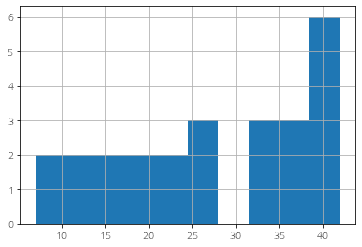

In [62]:
df_final_jongam['선형결합_지수'].hist()

{'boxes': [<matplotlib.lines.Line2D at 0x7f7e53411cf8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7e5341e748>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7e53429208>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7e5341ee48>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7e5341e048>,
  <matplotlib.lines.Line2D at 0x7f7e5341e3c8>]}

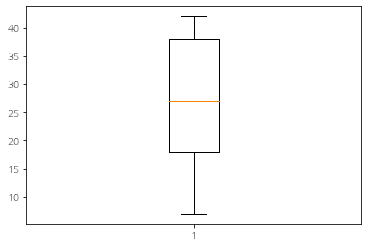

In [63]:
plt.boxplot(df_final_jongam['선형결합_지수'])

### 위치정보 merge

In [67]:
merge_base = pd.read_csv('/content/drive/My Drive/Project/Seoul/가공데이터/동3개/지수결과/종암동 돌봄틈새공백.csv')[['gid', '위도', '경도', '행정동코드']]
merge_base

,gid,위도,경도,행정동코드
0,다사58aa55aa,37.594579,127.025650,1129070500
1,다사58ab54bb,37.592337,127.028496,1129070500
2,다사58ab55aa,37.594590,127.028482,1129070500
3,다사58ab55ab,37.596844,127.028468,1129070500
4,다사58ab55ba,37.599097,127.028454,1129070500
5,다사58ab55bb,37.601350,127.028439,1129070500
6,다사58ba54bb,37.592348,127.031328,1129070500
7,다사58ba55aa,37.594602,127.031314,1129070500
8,다사58ba55ab,37.596855,127.031300,1129070500
9,다사58ba55ba,37.599108,127.031286,1129070500


In [68]:
df_loc_jongam = merge_base.merge(df_final_jongam, on='gid').sort_values(by = '선형결합_지수', ascending = False).reset_index().drop('index', axis=1)
df_loc_jongam

,gid,위도,경도,행정동코드,시군구명,행정동명,돌봄시설중요지수_분위,틈새돌봄_분위,소득_분위,선형결합_지수
0,다사58bb55aa,37.594613,127.034146,1129070500,성북구,종암동,10,8,6,42
1,다사59ab55ba,37.599142,127.039782,1129070500,성북구,종암동,10,10,1,41
2,다사59aa55bb,37.601384,127.036936,1129070500,성북구,종암동,8,10,5,41
3,다사58ba55ab,37.596855,127.031300,1129070500,성북구,종암동,10,9,3,41
4,다사59aa55ab,37.596877,127.036964,1129070500,성북구,종암동,9,7,8,40
5,다사59aa55ba,37.599131,127.036950,1129070500,성북구,종암동,8,7,9,39
6,다사59ab55ab,37.596888,127.039796,1129070500,성북구,종암동,9,6,8,38
7,다사58ba55ba,37.599108,127.031286,1129070500,성북구,종암동,7,10,2,36
8,다사58bb55bb,37.601373,127.034104,1129070500,성북구,종암동,6,8,7,35
9,다사59ab55aa,37.594635,127.039809,1129070500,성북구,종암동,7,5,8,32


In [69]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(df_loc_jongam['경도'], df_loc_jongam['위도'])]
# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}
# Creating a Geographic data frame 
df_loc_jongam = gpd.GeoDataFrame(df_loc_jongam, crs=crs, geometry=geometry)
df_loc_jongam

,gid,위도,경도,행정동코드,시군구명,행정동명,돌봄시설중요지수_분위,틈새돌봄_분위,소득_분위,선형결합_지수,geometry
0,다사58bb55aa,37.594613,127.034146,1129070500,성북구,종암동,10,8,6,42,POINT (127.03415 37.59461)
1,다사59ab55ba,37.599142,127.039782,1129070500,성북구,종암동,10,10,1,41,POINT (127.03978 37.59914)
2,다사59aa55bb,37.601384,127.036936,1129070500,성북구,종암동,8,10,5,41,POINT (127.03694 37.60138)
3,다사58ba55ab,37.596855,127.031300,1129070500,성북구,종암동,10,9,3,41,POINT (127.03130 37.59685)
4,다사59aa55ab,37.596877,127.036964,1129070500,성북구,종암동,9,7,8,40,POINT (127.03696 37.59688)
5,다사59aa55ba,37.599131,127.036950,1129070500,성북구,종암동,8,7,9,39,POINT (127.03695 37.59913)
6,다사59ab55ab,37.596888,127.039796,1129070500,성북구,종암동,9,6,8,38,POINT (127.03980 37.59689)
7,다사58ba55ba,37.599108,127.031286,1129070500,성북구,종암동,7,10,2,36,POINT (127.03129 37.59911)
8,다사58bb55bb,37.601373,127.034104,1129070500,성북구,종암동,6,8,7,35,POINT (127.03410 37.60137)
9,다사59ab55aa,37.594635,127.039809,1129070500,성북구,종암동,7,5,8,32,POINT (127.03981 37.59464)


### 시각화_종암동

In [11]:
dong_geo = gpd.read_file('/content/drive/My Drive/Project/Seoul/서울시_행정동경계/hangjeongdong_boundary.geojson')

In [110]:
jongam_geo = dong_geo[dong_geo['행정동코드']==1129070500]
jongam_geo

,행정동코드,시군구명,읍면동명,위도,경도,geometry
128,1129070500,성북구,종암동,37.59725,127.033374,"MULTIPOLYGON (((127.03218 37.60346, 127.03852 ..."


In [106]:
df_pop = pd.read_pickle('/content/drive/My Drive/Project/Seoul/가공데이터/동3개/동3개_초등학교881m_인구.pickle')
df_pop

,gid,행정동코드,시군구명,행정동,학교명,학교개수,초등학생_인구,30대_인구,40대_인구,전체_인구,경도,위도,geometry
0,다사41ab48ba,1150054000,강서구,화곡제1동,"[서울신원초등학교, 서울월정초등학교, 서울신월초등학교]",3,125.0,310.0,359.0,2085.0,126.836440,37.535080,POINT (126.83644 37.53508)
1,다사41ab48bb,1150054000,강서구,화곡제1동,"[서울강신초등학교, 서울월정초등학교, 서울신월초등학교]",3,64.0,353.0,360.0,2006.0,126.836420,37.537333,POINT (126.83642 37.53733)
2,다사41ab49aa,1150054000,강서구,화곡제1동,"[서울강신초등학교, 서울월정초등학교, 서울신월초등학교]",3,104.0,430.0,403.0,2288.0,126.836400,37.539586,POINT (126.83640 37.53959)
3,다사41ba48aa,1150054000,강서구,화곡제1동,"[서울신원초등학교, 서울신강초등학교, 서울월정초등학교]",3,68.0,559.0,397.0,2535.0,126.839309,37.530589,POINT (126.83931 37.53059)
4,다사41ba48ab,1150054000,강서구,화곡제1동,"[서울신강초등학교, 서울월정초등학교, 서울신월초등학교]",3,64.0,493.0,350.0,2542.0,126.839289,37.532842,POINT (126.83929 37.53284)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,다사65ab50ab,1121581000,광진구,광장동,"[서울광장초등학교, 서울동의초등학교]",2,14.0,43.0,43.0,433.0,127.107999,37.552067,POINT (127.10800 37.55207)
77,다사65ab50ba,1121581000,광진구,광장동,"[서울광장초등학교, 서울동의초등학교]",2,0.0,0.0,0.0,0.0,127.107987,37.554320,POINT (127.10799 37.55432)
78,다사65ab50bb,1121581000,광진구,광장동,[서울동의초등학교],1,0.0,0.0,0.0,0.0,127.107975,37.556574,POINT (127.10798 37.55657)
79,다사65ba49bb,1121581000,광진구,광장동,[서울광장초등학교],1,0.0,0.0,6.0,32.0,127.110853,37.547570,POINT (127.11085 37.54757)


In [107]:
# 종암동 초등학교 인구 
jongam_ele_pop = df_pop.groupby(['행정동코드','행정동'],as_index=False).agg('sum').drop(['경도', '위도'],axis=1)
jongam_ele_pop = jongam_ele_pop.merge(df_pop[['행정동코드', '위도', '경도']], on='행정동코드')
jongam_ele_pop

,행정동코드,행정동,학교개수,초등학생_인구,30대_인구,40대_인구,전체_인구,위도,경도
0,1121581000,광장동,102,3448.0,4209.0,7993.0,39125.0,37.543006,127.093896
1,1121581000,광장동,102,3448.0,4209.0,7993.0,39125.0,37.540762,127.096739
2,1121581000,광장동,102,3448.0,4209.0,7993.0,39125.0,37.543016,127.096726
3,1121581000,광장동,102,3448.0,4209.0,7993.0,39125.0,37.545269,127.096714
4,1121581000,광장동,102,3448.0,4209.0,7993.0,39125.0,37.538519,127.099580
...,...,...,...,...,...,...,...,...,...
76,1150054000,화곡제1동,56,1278.0,9798.0,7283.0,46557.0,37.537365,126.842079
77,1150054000,화곡제1동,56,1278.0,9798.0,7283.0,46557.0,37.528367,126.844988
78,1150054000,화곡제1동,56,1278.0,9798.0,7283.0,46557.0,37.530621,126.844968
79,1150054000,화곡제1동,56,1278.0,9798.0,7283.0,46557.0,37.532874,126.844948


In [112]:
df_school = pd.read_pickle('/content/drive/My Drive/Project/Seoul/초등학교/초등학교.pickle')

# 은평구 초등학교 위치 (+ 마포구)
mask1 = df_school['구']=='성북구'
# mask2 = df_school['구']== '마포구'
jongam_school = df_school[mask1]
jongam_school

,학교명,구,행정동코드,행정동,소재지지번주소,소재지도로명주소,위도,경도,geometry
540,서울돈암초등학교,성북구,1129057500,동선동,서울특별시 성북구 동소문동6가 27-1,서울특별시 성북구 동소문로13길 38,37.593714,127.013103,POINT (127.01310 37.59371)
541,서울정덕초등학교,성북구,1129057500,동선동,서울특별시 성북구 동소문동7가 118-1,서울특별시 성북구 아리랑로 63,37.598239,127.013421,POINT (127.01342 37.59824)
542,서울삼선초등학교,성북구,1129055500,삼선동,서울특별시 성북구 삼선동3가 30-4,서울특별시 성북구 보문로29길 106,37.587143,127.012672,POINT (127.01267 37.58714)
543,서울안암초등학교,성북구,1129060000,안암동,서울특별시 성북구 안암동2가 93,서울특별시 성북구 고려대로7가길 39,37.587159,127.022101,POINT (127.02210 37.58716)
544,서울동신초등학교,성북구,1129061000,보문동,서울특별시 성북구 보문동3가 228,서울특별시 성북구 보문사길 50,37.583286,127.017059,POINT (127.01706 37.58329)
545,서울숭덕초등학교,성북구,1129063000,정릉제2동,서울특별시 성북구 정릉동 173-1,서울특별시 성북구 정릉로 279,37.603818,127.013291,POINT (127.01329 37.60382)
546,서울길원초등학교,성북구,1129066000,길음제1동,서울특별시 성북구 길음동 1280-4,서울특별시 성북구 길음로15길 55,37.609065,127.016798,POINT (127.01680 37.60907)
547,서울숭곡초등학교,성북구,1129071500,월곡제1동,서울특별시 성북구 하월곡동 84-86,서울특별시 성북구 종암로40길 30,37.608431,127.032816,POINT (127.03282 37.60843)
548,서울장월초등학교,성북구,1129078000,장위제3동,서울특별시 성북구 장위동 316,서울특별시 성북구 한천로101길 66,37.621941,127.047163,POINT (127.04716 37.62194)
549,서울월곡초등학교,성북구,1129077000,장위제2동,서울특별시 성북구 장위동 246-194,서울특별시 성북구 장월로3길 42,37.610023,127.046082,POINT (127.04608 37.61002)


In [ ]:
# Train 데이터 좌표 위치 
center = (37.454251,	126.890860)
zoom = 13
#  tiles='cartodbpositron'

m = folium.Map(location=center, zoom_start=zoom)
folium.Choropleth(
    geo_data = jongam_geo,
    data = jongam_ele_pop,
    columns = ('행정동', '초등학생_인구'),
    key_on = 'feature.properties.읍면동명',
    fill_color = 'Blues',
    legend_name = '초등학생_인구'
).add_to(m)

# 행정동 naming 
for index, row in jongam_geo.iterrows():
    title = f"{row['시군구명']} - {row['읍면동명']}"
    folium.CircleMarker([row['위도'], row['경도']], popup=title, radius =1,color = 'white').add_to(m)

# 초등학교 위치
for index, row in jongam_school.iterrows():
    title = f"{row['학교명']}"
    folium.Marker([row['위도'], row['경도']],popup=title,  icon=folium.Icon(icon ='dumbell', color = 'blue')).add_to(m)  
    # folium.Circle([row['위도'], row['경도']], radius =881, fill='#ffa5a5', color = '#ffa5a5').add_to(m)

# # 전체 target 좌표
# for index, row in pop_30.iterrows():  
#     folium.Circle([row['위도'], row['경도']],
#                   radius = 3, color = 'red' ).add_to(m)   
# 행정동 내 좌표 
for index, row in df_pop.iterrows():  
    folium.Circle([row['위도'], row['경도']],
                  radius = 3, color = 'black' ).add_to(m)

for index, row in df_loc_jongam[:1].iterrows():
  folium.Marker([row['위도'], row['경도']], icon=folium.Icon(icon ='dumbell', color = 'red')).add_to(m)
  folium.Circle([row['위도'], row['경도']], radius =250, fill='#ffa5a5', color = 'blue').add_to(m)
  folium.Circle([row['위도'], row['경도']], radius =881, fill='#ffa5a5', color = '#ffa5a5').add_to(m)

# for index, row in df_jingwan[:1].iterrows():
#   folium.Marker([row['위도'], row['경도']], icon=folium.Icon(icon ='dumbell', color = 'green')).add_to(m)
#   folium.Circle([row['위도'], row['경도']], radius =881, fill='#ffa5a5', color = '#ffa5a5').add_to(m)
m

### 시설하나 추가 -> 격자 수정

In [ ]:
df_loc_jongam

,gid,위도,경도,행정동코드,시군구명,행정동명,돌봄시설중요지수_분위,틈새돌봄_분위,소득_분위,선형결합_지수,geometry
0,다사46ab40ab,37.461026,126.893632,1154561000,금천구,독산제1동,10,10,3,43,POINT (126.89363 37.46103)
1,다사46ba40ab,37.461040,126.896459,1154561000,금천구,독산제1동,10,10,2,42,POINT (126.89646 37.46104)
2,다사46ab40aa,37.458772,126.893650,1154561000,금천구,독산제1동,10,10,1,41,POINT (126.89365 37.45877)
3,다사46aa40ab,37.461011,126.890805,1154561000,금천구,독산제1동,9,9,5,41,POINT (126.89081 37.46101)
4,다사46aa40ba,37.463264,126.890787,1154561000,금천구,독산제1동,9,9,4,40,POINT (126.89079 37.46326)
5,다사46aa39bb,37.456504,126.890842,1154561000,금천구,독산제1동,7,7,10,38,POINT (126.89084 37.45650)
6,다사46ab41ab,37.470039,126.893559,1154561000,금천구,독산제1동,8,7,7,37,POINT (126.89356 37.47004)
7,다사46ba40aa,37.458787,126.896477,1154561000,금천구,독산제1동,9,8,2,36,POINT (126.89648 37.45879)
8,다사46ab41aa,37.467785,126.893578,1154561000,금천구,독산제1동,7,9,4,36,POINT (126.89358 37.46779)
9,다사46ab40bb,37.465532,126.893596,1154561000,금천구,독산제1동,7,8,6,36,POINT (126.89360 37.46553)


In [ ]:
# 현재 각 학교주변 있는 좌표들 구하기 
# 아아들 도보 10분:  749.82m ~ 880.98m -> 오차 고려해서 881m로 
from tqdm.notebook import tqdm

def point_school(df_pop, df_school):
  lscp = []

  for k in tqdm(range(len(df_pop))): 
    gid_nm = df_pop['gid'].iloc[k]
    x = (df_pop['위도'].iloc[k], df_pop['경도'].iloc[k])
    for i in range(len(df_school)): 
      y = (df_school['위도'].iloc[i], df_school['경도'].iloc[i])
      h = haversine(x,y, unit='m') 
      if h <= 881:  #전체 좌표 중에서 초등학교 881m 있는 것만 필터링
        lscp.append([gid_nm, df_school['행정동명'].iloc[i], h])
  
  return lscp 

In [ ]:
df_loc_doksman.head(1)

,gid,위도,경도,행정동코드,시군구명,행정동명,돌봄시설중요지수_분위,틈새돌봄_분위,소득_분위,선형결합_지수,geometry
0,다사46ab40ab,37.461026,126.893632,1154561000,금천구,독산제1동,10,10,3,43,POINT (126.89363 37.46103)


In [ ]:
doksan_update = pd.DataFrame(point_school(df_loc_doksan, df_loc_doksan.head(1)))
doksan_update

,0,1,2
0,다사46ab40ab,독산제1동,0.000000
1,다사46ba40ab,독산제1동,249.502243
2,다사46ab40aa,독산제1동,250.561631
3,다사46aa40ab,독산제1동,249.502161
4,다사46aa40ba,독산제1동,353.589517
5,다사46aa39bb,독산제1동,559.812070
6,다사46ba40aa,독산제1동,353.589769
7,다사46ab41aa,독산제1동,751.684319
8,다사46ab40bb,독산제1동,501.122975
9,다사46aa39ba,독산제1동,792.024170


## 광진구_선형결합 (광장동 1121581000)

In [70]:
df_demand = pd.read_pickle('/content/drive/My Drive/Project/Seoul/가공데이터/동3개/지수결과/광장동프라지수1014.pkl')
df_demand = df_demand[df_demand['행정동코드']==1121581000][['gid', '행정동', '100분위']]
df_demand['100분위'] = df_demand['100분위'].astype(int)
df_demand

,gid,행정동,100분위
0,다사64aa49ab,광장동,1
1,다사64ab49aa,광장동,8
2,다사64ab49ab,광장동,1
3,다사64ab49ba,광장동,1
4,다사64ba48bb,광장동,9
5,다사64ba49aa,광장동,10
6,다사64ba49ab,광장동,10
7,다사64ba49ba,광장동,1
8,다사64ba49bb,광장동,1
9,다사64ba50aa,광장동,1


In [71]:
df_demand.sort_values(by = '100분위', ascending=False)

,gid,행정동,100분위
25,다사65aa50aa,광장동,10
5,다사64ba49aa,광장동,10
6,다사64ba49ab,광장동,10
22,다사65aa49ab,광장동,10
14,다사64bb49ab,광장동,9
24,다사65aa49bb,광장동,9
4,다사64ba48bb,광장동,9
15,다사64bb49ba,광장동,9
23,다사65aa49ba,광장동,8
1,다사64ab49aa,광장동,8


In [72]:
df_alone = pd.read_csv("/content/drive/My Drive/Project/Seoul/가공데이터/동3개/지수결과/광장동_광진구 돌봄틈새공백.csv")
df_alone.columns = ['Unnamed: 0', 'gid', '행정동코드','시군구명','행정동명', '학교명', '학교개수', '초등학생_인구',
       '30대_인구', '40대_인구', '전체_인구', '경도', '위도', 'geometry', '돌봄 틈새공백 인구',
       '지역별 돌봄 틈새공백 인구 비율', '돌봄틈새공백 분위']
df_alone

,Unnamed: 0,gid,행정동코드,시군구명,행정동명,학교명,학교개수,초등학생_인구,30대_인구,40대_인구,전체_인구,경도,위도,geometry,돌봄 틈새공백 인구,지역별 돌봄 틈새공백 인구 비율,돌봄틈새공백 분위
0,0,다사64aa49ab,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울광진초등학교' '서울구남초등학교'],4,229.0,184.0,493.0,2184.0,127.093896,37.543006,POINT (127.0938964957107 37.54300589400516),0.708146,0.003092,9
1,1,다사64ab49aa,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울구남초등학교'],3,137.0,133.0,309.0,1335.0,127.096739,37.540762,POINT (127.0967385577301 37.54076224781233),0.452494,0.003303,8
2,2,다사64ab49ab,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울광장초등학교' '서울광진초등학교' '...,5,492.0,351.0,1044.0,4248.0,127.096726,37.543016,POINT (127.096726420853 37.54301559250802),1.611780,0.003276,10
3,3,다사64ab49ba,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울광장초등학교' '서울광진초등학교'],4,0.0,0.0,0.0,0.0,127.096714,37.545269,POINT (127.0967142826242 37.54526893633828),0.000000,0.000000,1
4,4,다사64ba48bb,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울구남초등학교'],3,182.0,622.0,569.0,3155.0,127.099580,37.538519,POINT (127.0995804494319 37.53851853137923),0.685385,0.003766,9
5,5,다사64ba49aa,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울구남초등학교'],3,677.0,443.0,1356.0,5484.0,127.099568,37.540772,POINT (127.0995683990606 37.54077187771924),2.215508,0.003273,10
6,6,다사64ba49ab,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울광장초등학교'],3,529.0,323.0,1026.0,3971.0,127.099556,37.543025,POINT (127.0995563473471 37.5430252231939),1.792746,0.003389,10
7,7,다사64ba49ba,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울광장초등학교' '서울광진초등학교'],4,0.0,0.0,0.0,0.0,127.099544,37.545279,POINT (127.0995442942914 37.5452785678032),0.000000,0.000000,1
8,8,다사64ba49bb,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울광장초등학교' '서울동의초등학교' '...,5,0.0,0.0,10.0,79.0,127.099532,37.547532,POINT (127.0995322398932 37.54753191154715),0.000000,0.000000,1
9,9,다사64ba50aa,1121581000,광진구,광장동,['서울양진초등학교' '서울광장초등학교' '서울동의초등학교' '서울광진초등학교'],4,0.0,0.0,0.0,7.0,127.099520,37.549785,POINT (127.0995201841525 37.54978525442569),0.000000,0.000000,1


In [73]:
df_alone.sort_values(by = '돌봄틈새공백 분위', ascending=False)

,Unnamed: 0,gid,행정동코드,시군구명,행정동명,학교명,학교개수,초등학생_인구,30대_인구,40대_인구,전체_인구,경도,위도,geometry,돌봄 틈새공백 인구,지역별 돌봄 틈새공백 인구 비율,돌봄틈새공백 분위
2,2,다사64ab49ab,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울광장초등학교' '서울광진초등학교' '...,5,492.0,351.0,1044.0,4248.0,127.096726,37.543016,POINT (127.096726420853 37.54301559250802),1.611780,0.003276,10
5,5,다사64ba49aa,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울구남초등학교'],3,677.0,443.0,1356.0,5484.0,127.099568,37.540772,POINT (127.0995683990606 37.54077187771924),2.215508,0.003273,10
6,6,다사64ba49ab,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울광장초등학교'],3,529.0,323.0,1026.0,3971.0,127.099556,37.543025,POINT (127.0995563473471 37.5430252231939),1.792746,0.003389,10
14,14,다사64bb49ab,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울광장초등학교'],3,365.0,310.0,805.0,3541.0,127.102386,37.543035,POINT (127.1023862751834 37.54303478606274),1.146549,0.003141,10
0,0,다사64aa49ab,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울광진초등학교' '서울구남초등학교'],4,229.0,184.0,493.0,2184.0,127.093896,37.543006,POINT (127.0938964957107 37.54300589400516),0.708146,0.003092,9
15,15,다사64bb49ba,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울광장초등학교'],3,192.0,182.0,441.0,2086.0,127.102374,37.545288,POINT (127.1023743073009 37.5452881314456),0.572039,0.002979,9
4,4,다사64ba48bb,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울구남초등학교'],3,182.0,622.0,569.0,3155.0,127.099580,37.538519,POINT (127.0995804494319 37.53851853137923),0.685385,0.003766,9
22,22,다사65aa49ab,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울광장초등학교'],3,211.0,274.0,466.0,2998.0,127.105216,37.543044,POINT (127.1052162043525 37.5430442811144),0.519557,0.002462,9
24,24,다사65aa49bb,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울광장초등학교' '서울동의초등학교'],4,69.0,267.0,234.0,1813.0,127.105192,37.547551,POINT (127.1051924376108 37.54755097255097),0.190213,0.002757,8
13,13,다사64bb49aa,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울광장초등학교'],3,60.0,50.0,144.0,620.0,127.102398,37.540781,POINT (127.1023982417331 37.54078143981457),0.187289,0.003121,8


In [74]:
df_demand.merge(df_alone, on = 'gid')

,gid,행정동,100분위,Unnamed: 0,행정동코드,시군구명,행정동명,학교명,학교개수,초등학생_인구,30대_인구,40대_인구,전체_인구,경도,위도,geometry,돌봄 틈새공백 인구,지역별 돌봄 틈새공백 인구 비율,돌봄틈새공백 분위
0,다사64aa49ab,광장동,1,0,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울광진초등학교' '서울구남초등학교'],4,229.0,184.0,493.0,2184.0,127.093896,37.543006,POINT (127.0938964957107 37.54300589400516),0.708146,0.003092,9
1,다사64ab49aa,광장동,8,1,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울구남초등학교'],3,137.0,133.0,309.0,1335.0,127.096739,37.540762,POINT (127.0967385577301 37.54076224781233),0.452494,0.003303,8
2,다사64ab49ab,광장동,1,2,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울광장초등학교' '서울광진초등학교' '...,5,492.0,351.0,1044.0,4248.0,127.096726,37.543016,POINT (127.096726420853 37.54301559250802),1.611780,0.003276,10
3,다사64ab49ba,광장동,1,3,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울광장초등학교' '서울광진초등학교'],4,0.0,0.0,0.0,0.0,127.096714,37.545269,POINT (127.0967142826242 37.54526893633828),0.000000,0.000000,1
4,다사64ba48bb,광장동,9,4,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울구남초등학교'],3,182.0,622.0,569.0,3155.0,127.099580,37.538519,POINT (127.0995804494319 37.53851853137923),0.685385,0.003766,9
5,다사64ba49aa,광장동,10,5,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울구남초등학교'],3,677.0,443.0,1356.0,5484.0,127.099568,37.540772,POINT (127.0995683990606 37.54077187771924),2.215508,0.003273,10
6,다사64ba49ab,광장동,10,6,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울광장초등학교'],3,529.0,323.0,1026.0,3971.0,127.099556,37.543025,POINT (127.0995563473471 37.5430252231939),1.792746,0.003389,10
7,다사64ba49ba,광장동,1,7,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울광장초등학교' '서울광진초등학교'],4,0.0,0.0,0.0,0.0,127.099544,37.545279,POINT (127.0995442942914 37.5452785678032),0.000000,0.000000,1
8,다사64ba49bb,광장동,1,8,1121581000,광진구,광장동,['서울양진초등학교' '서울광남초등학교' '서울광장초등학교' '서울동의초등학교' '...,5,0.0,0.0,10.0,79.0,127.099532,37.547532,POINT (127.0995322398932 37.54753191154715),0.000000,0.000000,1
9,다사64ba50aa,광장동,1,9,1121581000,광진구,광장동,['서울양진초등학교' '서울광장초등학교' '서울동의초등학교' '서울광진초등학교'],4,0.0,0.0,0.0,7.0,127.099520,37.549785,POINT (127.0995201841525 37.54978525442569),0.000000,0.000000,1


In [75]:
df_demand['gid'] = df_demand['gid']
df_alone['gid'] = df_alone['gid']
df_final = df_demand.merge(df_alone, on = 'gid')
df_final = df_final[['gid', '시군구명', '행정동명', '100분위','돌봄틈새공백 분위']]
df_final

,gid,시군구명,행정동명,100분위,돌봄틈새공백 분위
0,다사64aa49ab,광진구,광장동,1,9
1,다사64ab49aa,광진구,광장동,8,8
2,다사64ab49ab,광진구,광장동,1,10
3,다사64ab49ba,광진구,광장동,1,1
4,다사64ba48bb,광진구,광장동,9,9
5,다사64ba49aa,광진구,광장동,10,10
6,다사64ba49ab,광진구,광장동,10,10
7,다사64ba49ba,광진구,광장동,1,1
8,다사64ba49bb,광진구,광장동,1,1
9,다사64ba50aa,광진구,광장동,1,1


In [76]:
df_final.columns  = ['gid', '시군구명', '행정동명', '돌봄시설중요지수_분위', '틈새돌봄_분위']

In [77]:
# 소득
df_income = pd.read_csv('/content/drive/My Drive/Project/Seoul/가공데이터/동3개/지수결과/광장동_격자별_소득분위(k=3,5,35).csv')
df_income

,행정동코드,행정동,gid,추정소득 k=35,추정소득 k=5,추정소득 k=3,소득분위3,소득분위5,소득분위35
0,1121581000,광장동,다사64aa49ab,0.567186,0.512655,0.557975,5,5,5
1,1121581000,광장동,다사64ab49aa,0.823992,0.992871,0.774579,4,2,3
2,1121581000,광장동,다사64ab49ab,0.409399,0.617457,0.679032,4,5,6
3,1121581000,광장동,다사64ab49ba,1.247833,1.722157,1.568146,1,1,1
4,1121581000,광장동,다사64ba48bb,0.849595,0.886314,1.111480,1,2,3
5,1121581000,광장동,다사64ba49aa,0.726003,0.879141,1.004584,2,3,4
6,1121581000,광장동,다사64ba49ab,0.613000,1.005101,1.459424,1,2,4
7,1121581000,광장동,다사64ba49ba,1.573874,1.521703,0.910428,2,1,1
8,1121581000,광장동,다사64ba49bb,1.573874,1.521703,0.910428,2,1,1
9,1121581000,광장동,다사64ba50aa,-0.139255,-0.188115,-0.126888,7,8,9


In [78]:
df_income.sort_values(by = '소득분위35', ascending=False)

,행정동코드,행정동,gid,추정소득 k=35,추정소득 k=5,추정소득 k=3,소득분위3,소득분위5,소득분위35
36,1121581000,광장동,다사65ab50bb,-0.218518,-0.415741,-0.485421,10,10,10
35,1121581000,광장동,다사65ab50ba,-0.235341,-0.415741,-0.485421,10,10,10
29,1121581000,광장동,다사65aa51aa,-0.185252,-0.415741,-0.485421,10,10,10
10,1121581000,광장동,다사64ba50ab,-0.429124,-0.188115,-0.126888,7,8,10
37,1121581000,광장동,다사65ba49bb,-0.093088,-0.568516,-0.599013,10,10,9
34,1121581000,광장동,다사65ab50ab,-0.107952,-0.401325,-0.426104,9,9,9
28,1121581000,광장동,다사65aa50bb,-0.027008,-0.415741,-0.485421,10,10,9
9,1121581000,광장동,다사64ba50aa,-0.139255,-0.188115,-0.126888,7,8,9
19,1121581000,광장동,다사64bb50ba,-0.010772,-0.188115,-0.126888,7,8,8
18,1121581000,광장동,다사64bb50ab,0.056990,-0.241361,-0.277177,9,9,8


### merge

In [79]:
df_1 = df_demand.merge(df_alone, on = 'gid')
df_final_gwangjang = df_1.merge(df_income, on='gid')

df_final_gwangjang = df_final_gwangjang[['gid', '시군구명', '행정동명', '100분위','돌봄틈새공백 분위','소득분위35']]
df_final_gwangjang.columns = ['gid', '시군구명', '행정동명', '돌봄시설중요지수_분위','틈새돌봄_분위','소득_분위']
df_final_gwangjang

,gid,시군구명,행정동명,돌봄시설중요지수_분위,틈새돌봄_분위,소득_분위
0,다사64aa49ab,광진구,광장동,1,9,5
1,다사64ab49aa,광진구,광장동,8,8,3
2,다사64ab49ab,광진구,광장동,1,10,6
3,다사64ab49ba,광진구,광장동,1,1,1
4,다사64ba48bb,광진구,광장동,9,9,3
5,다사64ba49aa,광진구,광장동,10,10,4
6,다사64ba49ab,광진구,광장동,10,10,4
7,다사64ba49ba,광진구,광장동,1,1,1
8,다사64ba49bb,광진구,광장동,1,1,1
9,다사64ba50aa,광진구,광장동,1,1,9


In [80]:
# 돌봄에 많이 
a, b, c = 2, 2, 1

df_final_gwangjang['선형결합_지수'] = df_final_gwangjang['돌봄시설중요지수_분위']*a + df_final_gwangjang['틈새돌봄_분위']*b + df_final_gwangjang['소득_분위']*c
df_final_gwangjang = df_final_gwangjang.sort_values(by = '선형결합_지수', ascending = False)
df_final_gwangjang

,gid,시군구명,행정동명,돌봄시설중요지수_분위,틈새돌봄_분위,소득_분위,선형결합_지수
5,다사64ba49aa,광진구,광장동,10,10,4,44
6,다사64ba49ab,광진구,광장동,10,10,4,44
25,다사65aa50aa,광진구,광장동,10,7,8,42
15,다사64bb49ba,광진구,광장동,9,9,6,42
14,다사64bb49ab,광진구,광장동,9,10,2,40
4,다사64ba48bb,광진구,광장동,9,9,3,39
22,다사65aa49ab,광진구,광장동,10,9,1,39
24,다사65aa49bb,광진구,광장동,9,8,4,38
16,다사64bb49bb,광진구,광장동,8,8,5,37
33,다사65ab50aa,광진구,광장동,8,7,7,37


In [81]:
df_final_gwangjang.head(10)

,gid,시군구명,행정동명,돌봄시설중요지수_분위,틈새돌봄_분위,소득_분위,선형결합_지수
5,다사64ba49aa,광진구,광장동,10,10,4,44
6,다사64ba49ab,광진구,광장동,10,10,4,44
25,다사65aa50aa,광진구,광장동,10,7,8,42
15,다사64bb49ba,광진구,광장동,9,9,6,42
14,다사64bb49ab,광진구,광장동,9,10,2,40
4,다사64ba48bb,광진구,광장동,9,9,3,39
22,다사65aa49ab,광진구,광장동,10,9,1,39
24,다사65aa49bb,광진구,광장동,9,8,4,38
16,다사64bb49bb,광진구,광장동,8,8,5,37
33,다사65ab50aa,광진구,광장동,8,7,7,37


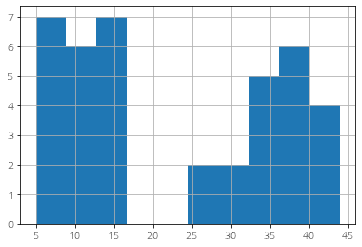

In [82]:
df_final_gwangjang['선형결합_지수'].hist()

{'boxes': [<matplotlib.lines.Line2D at 0x7f7e53329978>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7e532b73c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7e532b7e48>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7e532b7ac8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7e53329c88>,
  <matplotlib.lines.Line2D at 0x7f7e532b7048>]}

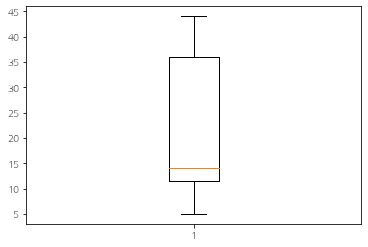

In [83]:
plt.boxplot(df_final_gwangjang['선형결합_지수'])

### 위치정보 merge

In [84]:
merge_base = pd.read_csv('/content/drive/My Drive/Project/Seoul/가공데이터/동3개/지수결과/광장동_광진구 돌봄틈새공백.csv')[['gid', '위도', '경도', '행정동코드']]
merge_base

,gid,위도,경도,행정동코드
0,다사64aa49ab,37.543006,127.093896,1121581000
1,다사64ab49aa,37.540762,127.096739,1121581000
2,다사64ab49ab,37.543016,127.096726,1121581000
3,다사64ab49ba,37.545269,127.096714,1121581000
4,다사64ba48bb,37.538519,127.099580,1121581000
5,다사64ba49aa,37.540772,127.099568,1121581000
6,다사64ba49ab,37.543025,127.099556,1121581000
7,다사64ba49ba,37.545279,127.099544,1121581000
8,다사64ba49bb,37.547532,127.099532,1121581000
9,다사64ba50aa,37.549785,127.099520,1121581000


In [85]:
df_loc_gwangjang = merge_base.merge(df_final_gwangjang, on='gid').sort_values(by = '선형결합_지수', ascending = False).reset_index().drop('index', axis=1)
df_loc_gwangjang

,gid,위도,경도,행정동코드,시군구명,행정동명,돌봄시설중요지수_분위,틈새돌봄_분위,소득_분위,선형결합_지수
0,다사64ba49aa,37.540772,127.099568,1121581000,광진구,광장동,10,10,4,44
1,다사64ba49ab,37.543025,127.099556,1121581000,광진구,광장동,10,10,4,44
2,다사65aa50aa,37.549804,127.105181,1121581000,광진구,광장동,10,7,8,42
3,다사64bb49ba,37.545288,127.102374,1121581000,광진구,광장동,9,9,6,42
4,다사64bb49ab,37.543035,127.102386,1121581000,광진구,광장동,9,10,2,40
5,다사64ba48bb,37.538519,127.099580,1121581000,광진구,광장동,9,9,3,39
6,다사65aa49ab,37.543044,127.105216,1121581000,광진구,광장동,10,9,1,39
7,다사65aa49bb,37.547551,127.105192,1121581000,광진구,광장동,9,8,4,38
8,다사64bb49bb,37.547541,127.102362,1121581000,광진구,광장동,8,8,5,37
9,다사65ab50aa,37.549814,127.108011,1121581000,광진구,광장동,8,7,7,37


In [86]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(df_loc_gwangjang['경도'], df_loc_gwangjang['위도'])]
# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}
# Creating a Geographic data frame 
df_loc_gwangjang = gpd.GeoDataFrame(df_loc_gwangjang, crs=crs, geometry=geometry)
df_loc_gwangjang

,gid,위도,경도,행정동코드,시군구명,행정동명,돌봄시설중요지수_분위,틈새돌봄_분위,소득_분위,선형결합_지수,geometry
0,다사64ba49aa,37.540772,127.099568,1121581000,광진구,광장동,10,10,4,44,POINT (127.09957 37.54077)
1,다사64ba49ab,37.543025,127.099556,1121581000,광진구,광장동,10,10,4,44,POINT (127.09956 37.54303)
2,다사65aa50aa,37.549804,127.105181,1121581000,광진구,광장동,10,7,8,42,POINT (127.10518 37.54980)
3,다사64bb49ba,37.545288,127.102374,1121581000,광진구,광장동,9,9,6,42,POINT (127.10237 37.54529)
4,다사64bb49ab,37.543035,127.102386,1121581000,광진구,광장동,9,10,2,40,POINT (127.10239 37.54303)
5,다사64ba48bb,37.538519,127.099580,1121581000,광진구,광장동,9,9,3,39,POINT (127.09958 37.53852)
6,다사65aa49ab,37.543044,127.105216,1121581000,광진구,광장동,10,9,1,39,POINT (127.10522 37.54304)
7,다사65aa49bb,37.547551,127.105192,1121581000,광진구,광장동,9,8,4,38,POINT (127.10519 37.54755)
8,다사64bb49bb,37.547541,127.102362,1121581000,광진구,광장동,8,8,5,37,POINT (127.10236 37.54754)
9,다사65ab50aa,37.549814,127.108011,1121581000,광진구,광장동,8,7,7,37,POINT (127.10801 37.54981)


### 시각화_광장동

In [87]:
dong_geo = gpd.read_file('/content/drive/My Drive/Project/Seoul/서울시_행정동경계/hangjeongdong_boundary.geojson')

In [88]:
gwangjang_geo = dong_geo[dong_geo['행정동코드']==1121581000]
gwangjang_geo

,행정동코드,시군구명,읍면동명,위도,경도,geometry
75,1121581000,광진구,광장동,37.548283,127.104873,"MULTIPOLYGON (((127.11377 37.55889, 127.11390 ..."


In [89]:
df_pop = pd.read_pickle('/content/drive/My Drive/Project/Seoul/가공데이터/동3개/동3개_초등학교881m_인구.pickle')
df_pop

,gid,행정동코드,시군구명,행정동,학교명,학교개수,초등학생_인구,30대_인구,40대_인구,전체_인구,경도,위도,geometry
0,다사41ab48ba,1150054000,강서구,화곡제1동,"[서울신원초등학교, 서울월정초등학교, 서울신월초등학교]",3,125.0,310.0,359.0,2085.0,126.836440,37.535080,POINT (126.83644 37.53508)
1,다사41ab48bb,1150054000,강서구,화곡제1동,"[서울강신초등학교, 서울월정초등학교, 서울신월초등학교]",3,64.0,353.0,360.0,2006.0,126.836420,37.537333,POINT (126.83642 37.53733)
2,다사41ab49aa,1150054000,강서구,화곡제1동,"[서울강신초등학교, 서울월정초등학교, 서울신월초등학교]",3,104.0,430.0,403.0,2288.0,126.836400,37.539586,POINT (126.83640 37.53959)
3,다사41ba48aa,1150054000,강서구,화곡제1동,"[서울신원초등학교, 서울신강초등학교, 서울월정초등학교]",3,68.0,559.0,397.0,2535.0,126.839309,37.530589,POINT (126.83931 37.53059)
4,다사41ba48ab,1150054000,강서구,화곡제1동,"[서울신강초등학교, 서울월정초등학교, 서울신월초등학교]",3,64.0,493.0,350.0,2542.0,126.839289,37.532842,POINT (126.83929 37.53284)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,다사65ab50ab,1121581000,광진구,광장동,"[서울광장초등학교, 서울동의초등학교]",2,14.0,43.0,43.0,433.0,127.107999,37.552067,POINT (127.10800 37.55207)
77,다사65ab50ba,1121581000,광진구,광장동,"[서울광장초등학교, 서울동의초등학교]",2,0.0,0.0,0.0,0.0,127.107987,37.554320,POINT (127.10799 37.55432)
78,다사65ab50bb,1121581000,광진구,광장동,[서울동의초등학교],1,0.0,0.0,0.0,0.0,127.107975,37.556574,POINT (127.10798 37.55657)
79,다사65ba49bb,1121581000,광진구,광장동,[서울광장초등학교],1,0.0,0.0,6.0,32.0,127.110853,37.547570,POINT (127.11085 37.54757)


In [90]:
# 광장동 초등학교 인구 
gwangjang_ele_pop = df_pop.groupby(['행정동코드','행정동'],as_index=False).agg('sum').drop(['경도', '위도'],axis=1)
gwangjang_ele_pop = gwangjang_ele_pop.merge(df_pop[['행정동코드', '위도', '경도']], on='행정동코드')
gwangjang_ele_pop

,행정동코드,행정동,학교개수,초등학생_인구,30대_인구,40대_인구,전체_인구,위도,경도
0,1121581000,광장동,102,3448.0,4209.0,7993.0,39125.0,37.543006,127.093896
1,1121581000,광장동,102,3448.0,4209.0,7993.0,39125.0,37.540762,127.096739
2,1121581000,광장동,102,3448.0,4209.0,7993.0,39125.0,37.543016,127.096726
3,1121581000,광장동,102,3448.0,4209.0,7993.0,39125.0,37.545269,127.096714
4,1121581000,광장동,102,3448.0,4209.0,7993.0,39125.0,37.538519,127.099580
...,...,...,...,...,...,...,...,...,...
76,1150054000,화곡제1동,56,1278.0,9798.0,7283.0,46557.0,37.537365,126.842079
77,1150054000,화곡제1동,56,1278.0,9798.0,7283.0,46557.0,37.528367,126.844988
78,1150054000,화곡제1동,56,1278.0,9798.0,7283.0,46557.0,37.530621,126.844968
79,1150054000,화곡제1동,56,1278.0,9798.0,7283.0,46557.0,37.532874,126.844948


In [91]:
df_school = pd.read_pickle('/content/drive/My Drive/Project/Seoul/초등학교/초등학교.pickle')

# 은평구 초등학교 위치 (+ 마포구)
mask1 = df_school['구']=='광진구'
# mask2 = df_school['구']== '마포구'
gwangjang_school = df_school[mask1]
gwangjang_school

,학교명,구,행정동코드,행정동,소재지지번주소,소재지도로명주소,위도,경도,geometry
518,서울양진초등학교,광진구,1121581000,광장동,서울특별시 광진구 광장동 414-1,서울특별시 광진구 워커힐로 32,37.544576,127.098325,POINT (127.09832 37.54458)
519,서울광남초등학교,광진구,1121581000,광장동,서울특별시 광진구 광장동 554,서울특별시 광진구 아차산로70길 35,37.540789,127.100664,POINT (127.10066 37.54079)
520,서울광장초등학교,광진구,1121581000,광장동,서울특별시 광진구 광장동 389-1,서울특별시 광진구 광장로1길 27,37.548548,127.101801,POINT (127.10180 37.54855)
521,서울동의초등학교,광진구,1121586000,구의제2동,서울특별시 광진구 구의동 4-5,서울특별시 광진구 영화사로 111,37.553423,127.099047,POINT (127.09905 37.55342)
522,서울광진초등학교,광진구,1121586000,구의제2동,서울특별시 광진구 구의동 60-44,서울특별시 광진구 자양로40길 41,37.547612,127.091335,POINT (127.09133 37.54761)
523,서울구남초등학교,광진구,1121587000,구의제3동,서울특별시 광진구 구의동 587-95,서울특별시 광진구 구의강변로 69,37.537095,127.092291,POINT (127.09229 37.53710)
524,서울장안초등학교,광진구,1121573000,군자동,서울특별시 광진구 군자동 365,서울특별시 광진구 군자로 74,37.549878,127.072403,POINT (127.07240 37.54988)
525,서울자양초등학교,광진구,1121582000,자양제1동,서울특별시 광진구 자양동 222-6,서울특별시 광진구 아차산로44길 26,37.536989,127.079740,POINT (127.07974 37.53699)
526,서울동자초등학교,광진구,1121584000,자양제3동,서울특별시 광진구 자양동 518-1,서울특별시 광진구 뚝섬로 561,37.535058,127.072180,POINT (127.07218 37.53506)
527,서울신양초등학교,광진구,1121584000,자양제3동,서울특별시 광진구 자양동 504,서울특별시 광진구 능동로 42,37.534624,127.069994,POINT (127.06999 37.53462)


In [92]:
# Train 데이터 좌표 위치 
center = (37.543044,	127.105216)
zoom = 13
# tiles='cartodbpositron'
m = folium.Map(location=center, zoom_start=zoom)
folium.Choropleth(
    geo_data = gwangjang_geo,
    data = gwangjang_ele_pop,
    columns = ('행정동', '초등학생_인구'),
    key_on = 'feature.properties.읍면동명',
    fill_color = 'Blues',
    legend_name = '초등학생_인구'
).add_to(m)

# 행정동 naming 
for index, row in gwangjang_geo.iterrows():
    title = f"{row['시군구명']} - {row['읍면동명']}"
    folium.CircleMarker([row['위도'], row['경도']], popup=title, radius =1,color = 'white').add_to(m)

# 초등학교 위치
for index, row in gwangjang_school.iterrows():
    title = f"{row['학교명']}"
    folium.Marker([row['위도'], row['경도']],popup=title).add_to(m)  
    # folium.Circle([row['위도'], row['경도']], radius =881, fill='#ffa5a5', color = '#ffa5a5').add_to(m)

# # 전체 target 좌표
# for index, row in pop_30.iterrows():  
#     folium.Circle([row['위도'], row['경도']],
#                   radius = 3, color = 'red' ).add_to(m)   
# 행정동 내 좌표 
for index, row in df_pop.iterrows():  
    folium.Circle([row['위도'], row['경도']],
                  radius = 3, color = 'black' ).add_to(m)

for index, row in df_loc_gwangjang[:1].iterrows():
  folium.Marker([row['위도'], row['경도']], icon=folium.Icon(icon ='dumbell', color = 'red')).add_to(m)
  folium.Circle([row['위도'], row['경도']], radius =250, fill='#ffa5a5', color = 'blue').add_to(m)
  folium.Circle([row['위도'], row['경도']], radius =881, fill='#ffa5a5', color = '#ffa5a5').add_to(m)

# for index, row in df_jingwan[:1].iterrows():
#   folium.Marker([row['위도'], row['경도']], icon=folium.Icon(icon ='dumbell', color = 'green')).add_to(m)
#   folium.Circle([row['위도'], row['경도']], radius =881, fill='#ffa5a5', color = '#ffa5a5').add_to(m)
m

In [93]:
grid_hwa = gpd.read_file('/content/drive/My Drive/Project/Seoul/인구/강서구/강서구_격자250_30대/강서구_30대_격자250.geojson')
grid_hwa

,gid,lbl,val,geometry
0,다사35aa50ba,None,NaN,"POLYGON ((935000.000 1950500.000, 935000.000 1..."
1,다사35aa50bb,None,NaN,"POLYGON ((935000.000 1950750.000, 935000.000 1..."
2,다사35aa51aa,None,NaN,"POLYGON ((935000.000 1951000.000, 935000.000 1..."
3,다사35ab50ab,None,NaN,"POLYGON ((935250.000 1950250.000, 935250.000 1..."
4,다사35ab50ba,None,NaN,"POLYGON ((935250.000 1950500.000, 935250.000 1..."
...,...,...,...,...
756,다사45aa50ba,None,NaN,"POLYGON ((945000.000 1950500.000, 945000.000 1..."
757,다사45aa50bb,None,NaN,"POLYGON ((945000.000 1950750.000, 945000.000 1..."
758,다사45aa51aa,None,NaN,"POLYGON ((945000.000 1951000.000, 945000.000 1..."
759,다사45ab50aa,None,NaN,"POLYGON ((945250.000 1950000.000, 945250.000 1..."


In [94]:
merge_base = df_loc_hwagok[['gid', '위도', '경도', '행정동명', '선형결합_지수']]
merge_base

,gid,위도,경도,행정동명,선형결합_지수
0,다사41ba48ba,37.535096,126.839270,화곡제1동,30
1,다사41ab48ba,37.535080,126.836440,화곡제1동,24
2,다사41bb48ba,37.535111,126.842099,화곡제1동,23
3,다사41ab49aa,37.539586,126.836400,화곡제1동,22
4,다사41ba48bb,37.537349,126.839250,화곡제1동,21
5,다사41bb48ab,37.532858,126.842119,화곡제1동,20
6,다사41bb48aa,37.530605,126.842139,화곡제1동,17
7,다사41bb47bb,37.528352,126.842158,화곡제1동,17
8,다사41ba49aa,37.539602,126.839230,화곡제1동,16
9,다사41ba48ab,37.532842,126.839289,화곡제1동,15


In [95]:
grid_hwa = merge_base.merge(grid_hwa, how ='left')
grid_hwa

,gid,위도,경도,행정동명,선형결합_지수,lbl,val,geometry
0,다사41ba48ba,37.535096,126.839270,화곡제1동,30,479.00,479.0,"POLYGON ((941500.000 1948500.000, 941500.000 1..."
1,다사41ab48ba,37.535080,126.836440,화곡제1동,24,310.00,310.0,"POLYGON ((941250.000 1948500.000, 941250.000 1..."
2,다사41bb48ba,37.535111,126.842099,화곡제1동,23,634.00,634.0,"POLYGON ((941750.000 1948500.000, 941750.000 1..."
3,다사41ab49aa,37.539586,126.836400,화곡제1동,22,430.00,430.0,"POLYGON ((941250.000 1949000.000, 941250.000 1..."
4,다사41ba48bb,37.537349,126.839250,화곡제1동,21,523.00,523.0,"POLYGON ((941500.000 1948750.000, 941500.000 1..."
5,다사41bb48ab,37.532858,126.842119,화곡제1동,20,648.00,648.0,"POLYGON ((941750.000 1948250.000, 941750.000 1..."
6,다사41bb48aa,37.530605,126.842139,화곡제1동,17,1209.00,1209.0,"POLYGON ((941750.000 1948000.000, 941750.000 1..."
7,다사41bb47bb,37.528352,126.842158,화곡제1동,17,983.00,983.0,"POLYGON ((941750.000 1947750.000, 941750.000 1..."
8,다사41ba49aa,37.539602,126.839230,화곡제1동,16,517.00,517.0,"POLYGON ((941500.000 1949000.000, 941500.000 1..."
9,다사41ba48ab,37.532842,126.839289,화곡제1동,15,493.00,493.0,"POLYGON ((941500.000 1948250.000, 941500.000 1..."


In [104]:
# Train 데이터 좌표 위치 
center = (37.535096,	126.839270)
zoom = 15
# cartodbpositron

m = folium.Map(location=center, zoom_start=zoom)

grid_hwa['색깔'] =1
# folium.Choropleth(
#     geo_data = hwagok_geo,
#     data = hwagok_ele_pop,
#     columns = ('행정동', '초등학생_인구'),
#     key_on = 'feature.properties.읍면동명',
#     fill_color = 'Blues',
#     weight=1,
#     fill_opacity =0.3,
#     legend_name = '초등학생_인구'
# ).add_to(m)

# folium.Choropleth(
#     geo_data = grid_hwa,
#     data = grid_hwa,
#     columns = ('gid', '색깔'),
#     key_on = 'feature.properties.gid',
#     fill_color = 'RdGy',
#     fill_opacity = 0,
#     opacity = 0.1,
#     weight = 0.5,
#     legend_name = '초등학생_인구'
# ).add_to(m)


folium.Choropleth(
    geo_data = hwagok_geo,
    data = hwagok_ele_pop,
    columns = ('행정동', '초등학생_인구'),
    key_on = 'feature.properties.읍면동명',
    fill_color = 'Blues',
    legend_name = '초등학생_인구'
).add_to(m)


# # 행정동 naming 
# for index, row in hwagok_geo.iterrows():
#     title = f"{row['시군구명']} - {row['읍면동명']}"
#     folium.CircleMarker([row['위도'], row['경도']], popup=title, radius =1,color = 'white').add_to(m)

# 초등학교 위치
for index, row in hwagok_school.iterrows():
    title = f"{row['학교명']}"
    folium.Marker([row['위도'], row['경도']],popup=title, icon=folium.Icon(icon ='dumbell', color = 'blue')).add_to(m)  
    # folium.Circle([row['위도'], row['경도']], radius =881, fill='#ffa5a5', color = '#ffa5a5').add_to(m)


# 행정동 내 좌표 
# for index, row in df_pop.iterrows():  
#     folium.Circle([row['위도'], row['경도']],
#                   radius = 3, color = 'black' ).add_to(m)

for index, row in df_loc_hwagok[:1].iterrows():
  folium.Marker([row['위도'], row['경도']], icon=folium.Icon(icon ='dumbell', color = 'red')).add_to(m)
  folium.Circle([row['위도'], row['경도']], radius =881, fill=1, color = '#3f72af', weight=0.1).add_to(m)
  folium.Circle([row['위도'], row['경도']], radius =250, fill=1, color = '#112d4e', weight =0.1).add_to(m)

# for index, row in df_jingwan[:1].iterrows():
#   folium.Marker([row['위도'], row['경도']], icon=folium.Icon(icon ='dumbell', color = 'green')).add_to(m)
#   folium.Circle([row['위도'], row['경도']], radius =881, fill='#ffa5a5', color = '#ffa5a5').add_to(m)
m

In [113]:
# Train 데이터 좌표 위치 
center = (37.454251,	126.890860)
zoom = 13
#  tiles='cartodbpositron'

m = folium.Map(location=center, zoom_start=zoom)

folium.Choropleth(
    geo_data = jongam_geo,
    data = hwagok_ele_pop,
    columns = ('행정동', '초등학생_인구'),
    key_on = 'feature.properties.읍면동명',
    fill_color = 'Blues',
        weight=0.5,
    fill_opacity =0.3,
    legend_name = '초등학생_인구'
).add_to(m)


# 초등학교 위치
for index, row in jongam_school.iterrows():
    title = f"{row['학교명']}"
    folium.Marker([row['위도'], row['경도']],popup=title,  icon=folium.Icon(icon ='dumbell', color = 'blue')).add_to(m)  
    # folium.Circle([row['위도'], row['경도']], radius =881, fill='#ffa5a5', color = '#ffa5a5').add_to(m)


for index, row in df_loc_jongam[:1].iterrows():
  folium.Marker([row['위도'], row['경도']], icon=folium.Icon(icon ='dumbell', color = 'red')).add_to(m)
  folium.Circle([row['위도'], row['경도']], radius =881, fill=3, color = '#3f72af', weight=0.1).add_to(m)
  folium.Circle([row['위도'], row['경도']], radius =250, fill=3, color = '#112d4e', weight =0.1).add_to(m)

# for index, row in df_jingwan[:1].iterrows():
#   folium.Marker([row['위도'], row['경도']], icon=folium.Icon(icon ='dumbell', color = 'green')).add_to(m)
#   folium.Circle([row['위도'], row['경도']], radius =881, fill='#ffa5a5', color = '#ffa5a5').add_to(m)
m

In [ ]:
# Train 데이터 좌표 위치 
center = (37.548283,	127.104873)
zoom = 13
#  tiles='cartodbpositron'

m = folium.Map(location=center, zoom_start=zoom, tiles='cartodbpositron')

hwagok_ele_pop['색깔']=1
folium.Choropleth(
    geo_data = gwangjang_geo,
    data = hwagok_ele_pop,
    columns = ('행정동', '색깔'),
    key_on = 'feature.properties.읍면동명',
    fill_color = 'Blues',
        weight=0.5,
    fill_opacity =0.3,
    legend_name = '초등학생_인구'
).add_to(m)


# 초등학교 위치
for index, row in gwangjang_school.iterrows():
    title = f"{row['학교명']}"
    folium.Marker([row['위도'], row['경도']],popup=title,  icon=folium.Icon(icon ='dumbell', color = 'red')).add_to(m)  
    # folium.Circle([row['위도'], row['경도']], radius =881, fill='#ffa5a5', color = '#ffa5a5').add_to(m)


for index, row in df_loc_gwangjang[:1].iterrows():
  folium.Marker([row['위도'], row['경도']], icon=folium.Icon(icon ='dumbell', color = 'red')).add_to(m)
  folium.Circle([row['위도'], row['경도']], radius =881, fill=3, color = '#3f72af', weight=0.1).add_to(m)
  folium.Circle([row['위도'], row['경도']], radius =250, fill=3, color = '#112d4e', weight =0.1).add_to(m)

# for index, row in df_jingwan[:1].iterrows():
#   folium.Marker([row['위도'], row['경도']], icon=folium.Icon(icon ='dumbell', color = 'green')).add_to(m)
#   folium.Circle([row['위도'], row['경도']], radius =881, fill='#ffa5a5', color = '#ffa5a5').add_to(m)
m

### 시설하나 추가 -> 격자 수정

In [ ]:
df_loc_gwangjang

,gid,위도,경도,행정동코드,시군구명,행정동명,돌봄시설중요지수_분위,틈새돌봄_분위,소득_분위,선형결합_지수,geometry
0,다사64ab49ab,37.543016,127.096726,1121581000,광진구,광장동,10,10,6,46,POINT (127.09673 37.54302)
1,다사64ba49aa,37.540772,127.099568,1121581000,광진구,광장동,10,10,4,44,POINT (127.09957 37.54077)
2,다사64aa49ab,37.543006,127.093896,1121581000,광진구,광장동,10,9,5,43,POINT (127.09390 37.54301)
3,다사64ba49ab,37.543025,127.099556,1121581000,광진구,광장동,9,10,4,42,POINT (127.09956 37.54303)
4,다사65aa50aa,37.549804,127.105181,1121581000,광진구,광장동,9,7,8,40,POINT (127.10518 37.54980)
5,다사64bb49ba,37.545288,127.102374,1121581000,광진구,광장동,8,9,6,40,POINT (127.10237 37.54529)
6,다사64bb49ab,37.543035,127.102386,1121581000,광진구,광장동,9,10,2,40,POINT (127.10239 37.54303)
7,다사65aa49bb,37.547551,127.105192,1121581000,광진구,광장동,10,8,4,40,POINT (127.10519 37.54755)
8,다사65aa49ab,37.543044,127.105216,1121581000,광진구,광장동,9,9,1,37,POINT (127.10522 37.54304)
9,다사64bb49bb,37.547541,127.102362,1121581000,광진구,광장동,8,8,5,37,POINT (127.10236 37.54754)


In [ ]:
# 현재 각 학교주변 있는 좌표들 구하기 
# 아아들 도보 10분:  749.82m ~ 880.98m -> 오차 고려해서 881m로 
from tqdm.notebook import tqdm

def point_school(df_pop, df_school):
  lscp = []

  for k in tqdm(range(len(df_pop))): 
    gid_nm = df_pop['gid'].iloc[k]
    x = (df_pop['위도'].iloc[k], df_pop['경도'].iloc[k])
    for i in range(len(df_school)): 
      y = (df_school['위도'].iloc[i], df_school['경도'].iloc[i])
      h = haversine(x,y, unit='m') 
      if h <= 881:  #전체 좌표 중에서 초등학교 881m 있는 것만 필터링
        lscp.append([gid_nm, df_school['행정동명'].iloc[i], h])
  
  return lscp 

In [ ]:
df_loc_gwangjang.head(1)

,gid,위도,경도,행정동코드,시군구명,행정동명,돌봄시설중요지수_분위,틈새돌봄_분위,소득_분위,선형결합_지수,geometry
0,다사64ab49ab,37.543016,127.096726,1121581000,광진구,광장동,10,10,6,46,POINT (127.09673 37.54302)


In [ ]:
gwangjang_update = pd.DataFrame(point_school(df_loc_gwangjang, df_loc_gwangjang.head(1)))
gwangjang_update

,0,1,2
0,다사64ab49ab,광장동,0.000000
1,다사64ba49aa,광장동,353.596694
2,다사64aa49ab,광장동,249.505933
3,다사64ba49ab,광장동,249.505987
4,다사64bb49ba,광장동,558.393982
5,다사64bb49ab,광장동,499.012028
6,다사65aa49ab,광장동,748.518122
7,다사64bb49bb,광장동,707.218708
8,다사64ba48bb,광장동,559.796297
9,다사65aa49ba,광장동,789.350773


In [ ]:
df_result = pd.concat([hwagok_update, gwangjang_update, doksan_update], axis=0).reset_index().drop('index', axis=1)
df_result

,0,1,2
0,다사41ba48ba,화곡제1동,0.000000
1,다사41ab48ba,화곡제1동,249.499485
2,다사41ba48bb,화곡제1동,250.556735
3,다사41bb48ba,화곡제1동,249.499574
4,다사41bb48aa,화곡제1동,559.777022
5,다사41ab49aa,화곡제1동,559.776393
6,다사42aa48aa,화곡제1동,707.167512
7,다사41ba48ab,화곡제1동,250.556831
8,다사41bb47bb,화곡제1동,791.982946
9,다사41bb48ab,화곡제1동,353.583625


In [ ]:
df_result.to_csv('/content/drive/My Drive/Project/Seoul/결과_키움센터추가될좌표.csv', index= False)